# Decreasing Customer Churn

One of the most critical factors in customer relationship management that directly impacts a company’s long-term profitability is customer attrition. When a company can better predict if a customer is likely to cut ties, it can take a more targeted approach to mitigate customer turnover.

## SCENARIO

I am an analyst for a telecommunications company that is concerned about the number of customers leaving their landline business for cable competitors. The company needs to know which customers are leaving and attempt to mitigate continued customer loss. I have been asked to analyze customer data to identify why customers are leaving and potential indicators to explain why those customers are leaving so the company can make an informed plan to mitigate further loss.

## Agenda

### Acquisition

In [30]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

warnings.filterwarnings("ignore")

df = pd.read_csv("Telco-Customer-Churn.csv", 
                 na_values={'TotalCharges': ' '}, 
                 true_values=['Yes'], 
                 false_values=['No', 'No phone service', 'No internet service'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.70,151.65,True


**Rows & columns:**

In [31]:
df.shape

(7043, 21)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   bool   
 4   Dependents        7043 non-null   bool   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   bool   
 7   MultipleLines     7043 non-null   bool   
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   bool   
 10  OnlineBackup      7043 non-null   bool   
 11  DeviceProtection  7043 non-null   bool   
 12  TechSupport       7043 non-null   bool   
 13  StreamingTV       7043 non-null   bool   
 14  StreamingMovies   7043 non-null   bool   
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   bool   


In [34]:
df.to_csv("extracted_data.csv")

### Data Exploration & Prep

#### Target Variable

The target variable is labeled 'Churn'. It is a binary qualitative, or categorical, variable containing a value of 'Yes' or 'No'. Customers who have churned are labeled with 'Yes', while those who are still active are labeled with 'No'. 

In [35]:
df[['customerID','Churn']].head()

,customerID,Churn
0,7590-VHVEG,False
1,5575-GNVDE,False
2,3668-QPYBK,True
3,7795-CFOCW,False
4,9237-HQITU,True


In [37]:
churn_frequency_table = (
    pd.DataFrame({'Customer Count': df.groupby(['Churn'])['Churn'].count(), 
                  'Customer Percent': round(df.groupby(['Churn'])['Churn'].count()/len(df.Churn)*100,2)})
)
churn_frequency_table

,Customer Count,Customer Percent
Churn,,
False,5174,73.46
True,1869,26.54


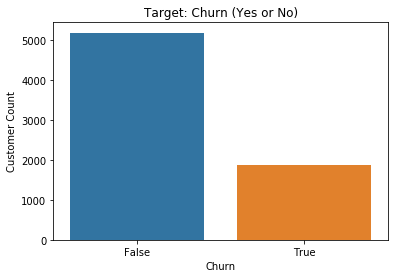

In [38]:
# count number of churned vs. active customers, store in dataframe churn_counts
sns.barplot(x="Churn", y="Customer Count", data=churn_frequency_table.reset_index())
plt.title('Target: Churn (Yes or No)')
plt.show()

#### Independent Predictor Variable

One of the original 19 independent variables is labeled 'InternetService'. It is a qualitative variable with 3 distinct categories: 'No', 'DSL', and 'Fiber optic'. A value of 'No' indicates the customer does not subscribe to any internet service from the provider. A value of 'DSL' indicates the customer recieves internet service via cable through DSL. A value of 'Fiber optic' indicates the customer subscribes to the provider's internet fiber service, which is a more advanced, higher quality, and often more expensive service. 

https://www.socket.net/blog/posts/fiber-tech/fiber-vs-dsl-whats-difference#:~:text=It's%20simple%20%E2%80%94%20fiber%20is%20fast,speeds%20100x%20faster%20than%20DSL.

In [39]:
df[['customerID','InternetService']].head()

,customerID,InternetService
0,7590-VHVEG,DSL
1,5575-GNVDE,DSL
2,3668-QPYBK,DSL
3,7795-CFOCW,DSL
4,9237-HQITU,Fiber optic


In [40]:
internet_service_frequency_table = (
    pd.DataFrame(
        {'Customer Count': df.groupby(['InternetService'])['InternetService'].count(), 
         'Customer Percent': round(
             df.groupby(['InternetService'])['InternetService'].count()/len(df.InternetService)*100,2
         )
        }
    )
)
internet_service_frequency_table

,Customer Count,Customer Percent
InternetService,,
DSL,2421,34.37
Fiber optic,3096,43.96
No,1526,21.67


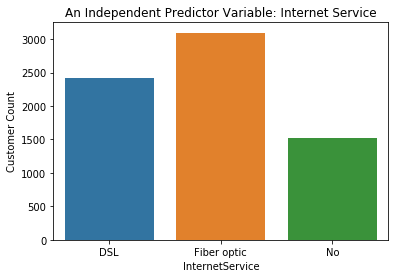

In [41]:
# count number of churned vs. active customers, store in dataframe churn_counts
sns.barplot(x="InternetService", y="Customer Count", data=internet_service_frequency_table.reset_index())
plt.title('An Independent Predictor Variable: Internet Service')
plt.show()

#### Data Cleansing

Missing values

'TotalCharges' is the only column with missing values, and there are a total of 11 observations missing a value for 'TotalCharges' (figure 1). These observations were all in their first month of service (tenure=0), and these are the only observations with a tenure of 0 (figure 2). The total charges of customers with a tenure of 1 month are equal to their 'MonthlyCharges'. Those with a tenure 2 months have total charges that are roughly twice their monthly charges, those at 3 months have total charges roughly 3 times their monthly charges, and so on. (figure 3). All of this information led to the decision to fill the missing values in TotalCharges with 0.00.

In [42]:
# number of missing records per column
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
Churn                0
OnlineSecurity       0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
customerID           0
dtype: int64

In [43]:
# filter to all customers with EITHER null TotalCharges OR tenure == 0
df[((df.TotalCharges.isnull()) | (df.tenure==0))][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN
3331,7644-OMVMY,0,19.85,NaN
3826,3213-VVOLG,0,25.35,NaN
4380,2520-SGTTA,0,20.00,NaN
5218,2923-ARZLG,0,19.70,NaN
6670,4075-WKNIU,0,73.35,NaN


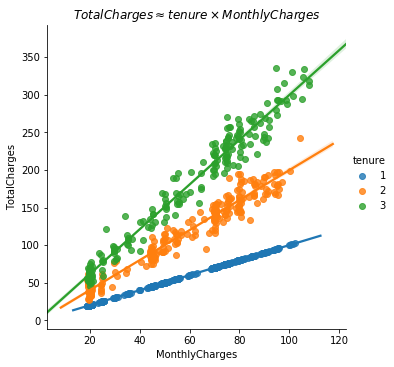

In [44]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', hue='tenure', fit_reg=True,
           data=df[(df.tenure==1) | (df.tenure==2) | (df.tenure==3)])
plt.title(r'$TotalCharges \approx tenure \times MonthlyCharges$')
plt.show()

In [45]:
# set all missing values to 0.00
df[df.TotalCharges.isnull()]['TotalCharges'] = 0.00

#### Feature Encoding

Because most classification algorithms require variables passed to them to be numeric, existing categorical variables needed to be encoded into numeric values. All variables with 'Yes' or 'No' values were converted to booleans (True/False) in the acquisition script, and those are stored numerically as zeros and ones in Python. Merely converting the datatype of these variables to integer will turn 'True' to 1 and 'False' to 0. 

To capture payment method in a more useful way with less noise, I created two new features, 'AutoPayment' and 'MailedCheck'. AutoPayments are represented by a 1 and include payments made via automatic bank transfer or automatic credit card. A value of 0 represents a manual method via mailed or electronic check. MailedCheck has a value of 1 if the customer's payment method is 'Mailed check' and a 0 otherwise. If a customer has a value of 0 for both AutoPayment and MailedCheck, then that customer's payment method is 'Electronic check'. 

Finally, dummy variables were generated for gender, InternetService and Contract. 

In [46]:
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

df[bool_columns] = df[bool_columns].astype('int')
df[bool_columns].head()

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,1
3,0,0,0,0,1,0,1,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1


In [47]:
# new var: AutoPayment, 1: 'Bank transfer (automatic)', 'Credit card (automatic)
df['Autopayment'] = df.isin({'PaymentMethod': ['Bank transfer (automatic)', 
                                               'Credit card (automatic)']})['PaymentMethod'].astype('int')

# new var: MailedCheck, 1: 'MailedCheck'
df['MailedCheck'] = df['PaymentMethod'].apply(lambda x: 1 if x == 'Mailed check' else 0)

# drop original PaymentMethod variable
df.drop(columns=['PaymentMethod'], inplace=True)

df[['Autopayment', 'MailedCheck']].head()

,Autopayment,MailedCheck
0,0,0
1,0,1
2,0,1
3,1,0
4,0,0


In [48]:
df = pd.get_dummies(df, prefix=[None, None, None], columns=['gender', 'InternetService', 'Contract'])

# drop one level of each original variable. 
df.drop(columns=['Male', 'No', 'Two year'], inplace=True)

df[['Female', 'DSL', 'Fiber optic', 'Month-to-month', 'One year']].head()

,Female,DSL,Fiber optic,Month-to-month,One year
0,1,1,0,1,0
1,0,1,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,1,1,0


#### Feature Engineering

Feature engineering is about discovering ways to better represent the underlying problem. Often, it is using domain expertise to create new features out of existing ones in order to achieve goals such as reducing noise in the data or minimizing feature interdependence. To achieve such goals in this project, I created the following new features:

1.	has_streaming: A binary feature with possible values of 0 or 1. Customers who subscribe to neither Streaming TV nor Streaming Movies are given a value of 0, and those who subscribe to at least one of those have a value of 1. StreamingTV and StreamingMovies are interdependent. 
2.	has_nonstreaming_services: A binary feature with possible values of 0 or 1. Customers who subscribe to one or more of the non-streaming services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) are assigned a 1, and those who subscribe to none of them, a 0. 
3.	has_partner_dependents: A binary feature with possible values of 0 or 1. Customers with a partner and/or dependents associated with their accounts are assigned a 1, while those with neither partner nor dependents on their accounts are assigned a 0. 
4.	tenure_bin: A discrete, ordinal feature with possible values of 0 (0-1 month), 1 (2-5 months), 2 (6-11 months), 3 (12-23 months), 4 (24-47 months), 5 (48-72 months).  
6.	adjusted_charges: In order to analyze the impact of amount charged on churn, it was necessary to normalize the charges based on the products and services consumed. As one would expect, more services lead to higher cost (except in the case of one phone line versus two phone lines, where there is no significant difference in price). AdjustedCharges was created by centering and scaling MonthlyPrice based on the mean price for each product/service combination. 


Customers who have one streaming service are significantly more likely to have the other, as evidenced in the Chi-square test below; therefore, merging these two variables into a single variable, has_streaming, will be useful. This new feature is binary with possible values of 0 or 1. Customers who subscribe to neither Streaming TV nor Streaming Movies are given a value of 0, and those who subscribe to at least one of those have a value of 1. 

In [49]:
observed = pd.crosstab(df['StreamingTV'], df['StreamingMovies'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print("chi2: ", chi2, " p-value: ", p, "\n")
print("observed:\n", observed)
print("\nexpected:\n", expected)

chi2:  1999.2949421486865  p-value:  0.0 

observed:
 StreamingMovies     0     1
StreamingTV                
0                3544   792
1                 767  1940

expected:
 [[2654.05310237 1681.94689763]
 [1656.94689763 1050.05310237]]


In [50]:
# create has_streaming variable, 0 or 1
df['has_streaming'] = (df['StreamingTV'] + df['StreamingMovies'] > 0).astype('int')

In addition to streaming, there are four other internet services available in our dataset. Looking at these four separately not only leads to much noise, but it also leads to a problem of interdependence across these variables (figure 12). For those reasons, I created a new variable, has_nonstreaming_services, that is binary with possible values of 0 or 1. Customers who subscribe to one or more of the non-streaming services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) are assigned a 1, and those who subscribe to none of them, a 0 (figure 13). 

In [51]:
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# loop through list of services, then loop through again to look at every unique combination.
# run chi2 test across each unique combo. 
for i in range(len(services)-1):
    for j in range(i+1,len(services)):
        if i>=j: 
            continue
        else:
            observed = pd.crosstab(df[services[i]], df[services[j]])
            chi2, p, degf, expected = stats.chi2_contingency(observed)
            print(services[i], " + ", services[j], "\nchi-square: ", chi2, " p-value: ", p, "\n")

OnlineSecurity  +  OnlineBackup 
chi-square:  566.0695583130064  p-value:  4.02067098305301e-125 

OnlineSecurity  +  DeviceProtection 
chi-square:  533.0432672109885  p-value:  6.149971294826684e-118 

OnlineSecurity  +  TechSupport 
chi-square:  885.5190999957663  p-value:  1.3798207044380244e-194 

OnlineBackup  +  DeviceProtection 
chi-square:  647.6004236510021  p-value:  7.429733099875319e-143 

OnlineBackup  +  TechSupport 
chi-square:  608.3704412955456  p-value:  2.5303596290852377e-134 

DeviceProtection  +  TechSupport 
chi-square:  780.9127224864196  p-value:  7.621515419329399e-172 



In [52]:
df['has_nonstreaming_services'] = ((
    df['OnlineSecurity'] + df['OnlineBackup'] + df['DeviceProtection'] + df['TechSupport']) > 0).astype('int')

Like streaming services, there is a strong relationship between having a partner and having dependents on the plan, as evidenced in the Chi-square test below; therefore, I merged these two variables into has_partner_dependents, a binary variable with possible values of 0 or 1. Customers with a partner and/or dependents associated with their accounts are assigned a 1, while those with neither partner nor dependents on their accounts are assigned a 0. 

In [53]:
observed = pd.crosstab(df['Partner'], df['Dependents'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print("chi2: ", chi2, " p-value: ", p, "\n")
print("observed:\n", observed)
print("\nexpected:\n", expected)

chi2:  1441.2452212367994  p-value:  0.0 

observed:
 Dependents     0     1
Partner               
0           3280   361
1           1653  1749

expected:
 [[2550.19920488 1090.80079512]
 [2382.80079512 1019.19920488]]


In [54]:
df['has_partner_dependents'] = ((df['Partner'] + df['Dependents']) > 0).astype('int')

Binning tenure, which is in units of months, reduces the noise and highlights the windows that customers are most likely to churn. The bins were chosen based on domain knowledge, contract lengths, and an analysis of when customers churn. The feature, tenure_bin, is a discrete, ordinal feature with possible values of 0 (0-1 month), 1 (2-5 months), 2 (6-11 months), 3 (12-23 months), 4 (24-47 months), 5 (48-72 months).

In [55]:
# tenure_bin:  0 (0-1 month), 1 (2-5 months), 2 (6-11 months), 3 (12-23 months), 
# 4 (24-47 months), 5 (48-72 months).

def bin_tenure(tenure):
    if tenure < 2:
        return 0
    elif tenure < 6:
        return 1
    elif tenure < 12:
        return 2
    elif tenure < 23:
        return 3
    elif tenure < 48:
        return 4
    else:
        return 5

df['tenure_bin'] = df.tenure.apply(bin_tenure)

In [56]:
pd.crosstab(df.tenure_bin, df.Churn)

Churn,False,True
tenure_bin,,
0,244,380
1,383,364
2,443,255
3,666,296
4,1357,352
5,2081,222


New customers: Customer is in first 6 months

In [59]:
df['new_customer'] = df['tenure_bin'] <= 1

Encode Target Variable

In [61]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,0,0,0,0,0
OnlineSecurity,0,1,1,1,0
OnlineBackup,1,0,1,0,0
DeviceProtection,0,1,0,1,0


In [62]:
# encode target var

df['Churn'] = df[['Churn']].astype('int')

6.	adjusted_charges: In order to analyze the impact of amount charged on churn, it was necessary to normalize the charges based on the products and services consumed. As one would expect, more services lead to higher cost. AdjustedCharges was created by centering and scaling MonthlyPrice based on the mean price for each product/service combination. 

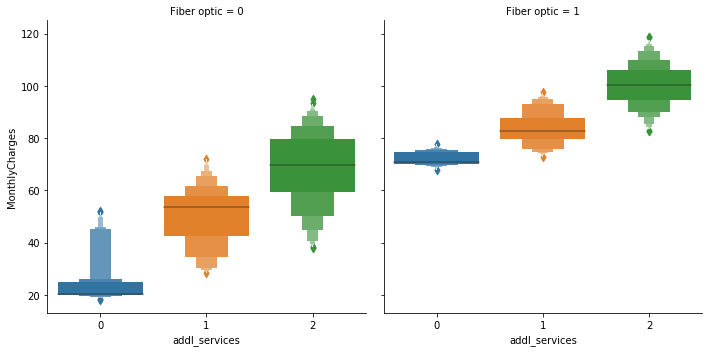

In [57]:
df['addl_services'] = df['has_nonstreaming_services'] + df['has_streaming']
g = sns.catplot(x='addl_services', y='MonthlyCharges', col='Fiber optic',  data=df, kind='boxen')
plt.show()

In [58]:
# Identify the median monthly charges for each unique combination of columns related to their service plan. 
service_plan_columns = ['DSL', 'Fiber optic', 'Month-to-month', 'addl_services', 'PhoneService']
services_df = df.groupby(service_plan_columns)['MonthlyCharges'].agg(['mean', 'std', 'count']).reset_index()

# join the mean and standard deviaton of each unique plan with the orignal dataframe
df = df.merge(services_df, on=service_plan_columns, how='left')

# craete adjusted_charges by computing the z-score for each plan group. 
df['adjusted_charges'] = (df['MonthlyCharges'] - df['mean'])/df['std']

Clean up data frame by dropping columns that are now unnecessary and standardizing column names. 

In [63]:
cols_to_drop = ['customerID', 'Partner', 'Dependents', 'DeviceProtection', 'StreamingTV', 'StreamingMovies',
                'MonthlyCharges', 'mean', 'std', 'count', 'addl_services']

df.drop(columns=cols_to_drop, inplace=True)
df.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,TotalCharges,Churn,...,DSL,Fiber optic,Month-to-month,One year,has_streaming,has_nonstreaming_services,has_partner_dependents,tenure_bin,adjusted_charges,new_customer
0,0,1,0,0,0,1,0,1,29.85,0,...,1,0,1,0,0,1,1,0,-0.892964,True
1,0,34,1,0,1,0,0,0,1889.50,0,...,1,0,0,1,0,1,0,4,-0.436087,False
2,0,2,1,0,1,1,0,1,108.15,1,...,1,0,1,0,0,1,0,1,-0.183705,True
3,0,45,0,0,1,0,1,0,1840.75,0,...,1,0,0,1,0,1,0,4,0.972164,False
4,0,2,1,0,0,0,0,1,151.65,1,...,0,1,1,0,0,0,0,1,-0.544307,True


In [64]:
df.columns = ['senior', 'tenure', 'has_phone', 'has_multiple_lines', 'online_security', 'online_backup', 
              'tech_support', 'paperless_bill', 'total_charges', 'churn', 'autopayment', 'mailed_check', 
              'female', 'dsl', 'fiber', 'm2m_contract', 'contract_1y', 'has_streaming', 
              'has_nonstreaming_services', 'has_partner_dependents', 'tenure_bin', 'adjusted_charges',
              'new_customer'
             ]

In [65]:
df.to_csv('cleaned_data.csv')

### Data Analysis

#### Univariate Statistics

Identify the distribution of variables using univariate statistics from your cleaned and prepared data. Represent your findings visually as part of your submission.

In [26]:
categorical_vars = ['senior', 'has_phone', 'has_multiple_lines', 'online_security', 'online_backup', 
                    'tech_support', 'paperless_bill', 'autopayment', 'mailed_check', 
                    'female', 'dsl', 'fiber', 'm2m_contract', 'contract_1y', 'has_streaming', 
                    'has_nonstreaming_services', 'has_partner_dependents', 'tenure_bin']

numeric_vars = ['tenure', 'adjusted_charges', 'total_charges']

target_var = 'churn'

##### Target Variable

Churn, the target variable, is somewhat imbalanced. The customers who have churned make up only 27% of the sample. 

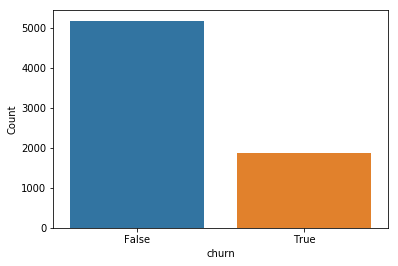

,Count,Percent
churn,,
False,5174,73.46
True,1869,26.54


In [27]:
# frequency table of churn with count and percent. 
target_distribution = pd.DataFrame(
    {'Count': df.groupby(['churn'])['churn'].count(), 
     'Percent': round(df.groupby(['churn'])['churn'].count()/len(df.churn)*100, 2)})
# bar plot of counts
sns.barplot(x=target_distribution.index, y=target_distribution.Count)
plt.show()
target_distribution

##### Qualitative Variables

Senior citizen customers, those who do not have a phone line, and those on a 1-year contract each represent less than 21% of the sample. This is something to be aware of in further analysis, but I decided to move forward with the knowledge and not make any changes at this point. 

In [28]:
pd.crosstab(df.churn, df.m2m_contract)

m2m_contract,0,1
churn,,
False,2954,2220
True,214,1655


In [28]:
def plot_univariate_qualitative_vars(cat_vars, cat_names):
    plt.figure(figsize=(16, 4))
    for i in range(len(cat_vars)):
        plt.subplot(1, len(cat_vars), i+1)
        freq = pd.DataFrame(
            {'Count': df.groupby([cat_vars[i]])[cat_vars[i]].count(), 
             'Percent': round(df.groupby([cat_vars[i]])[cat_vars[i]].count()/len(df.churn)*100, 2)
            })
        sns.barplot(x=freq.index, y=freq.Count)
        if i==0:
            plt.ylabel('Count')
        else:
            plt.ylabel('')
        plt.xlabel(cat_names[i])
        loc, labels = plt.xticks()
        if len(labels) == 2:
            plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
        # label points on the plot
        for x, y, z in zip(freq.index, freq.Count, freq.Percent):
            plt.text(x = x-.1, # x-coordinate position of data label
            y = 100, # y-coordinate position of data label, adjusted to be 150 below the data point
            s = '{:.0f}\n{:.0f}%'.format(y, z), # data label, formatted to ignore decimals

            color = 'white') # set colour of line
    plt.show()

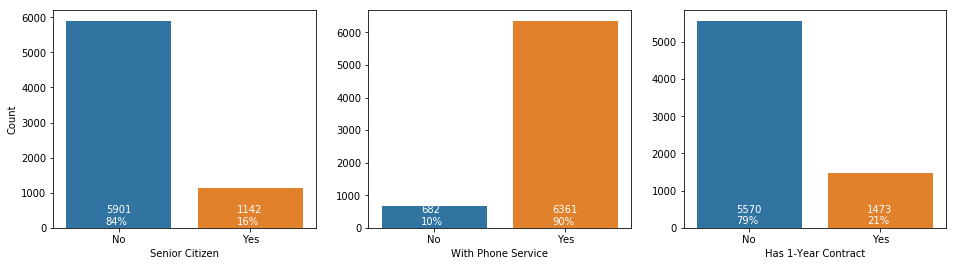

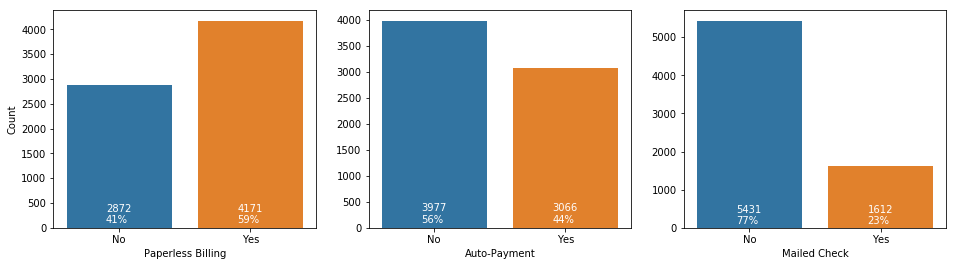

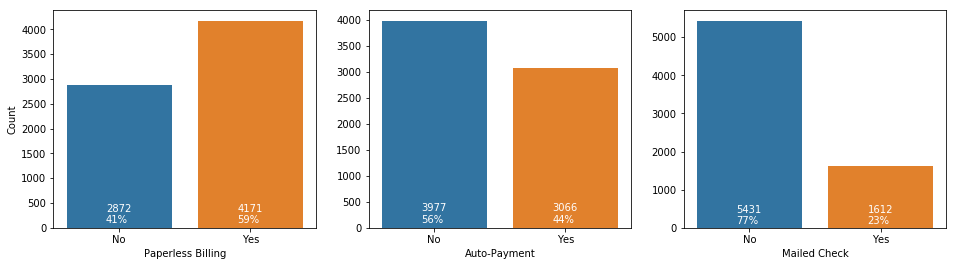

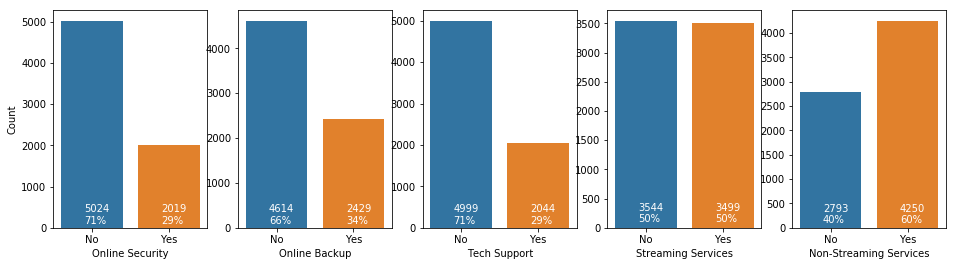

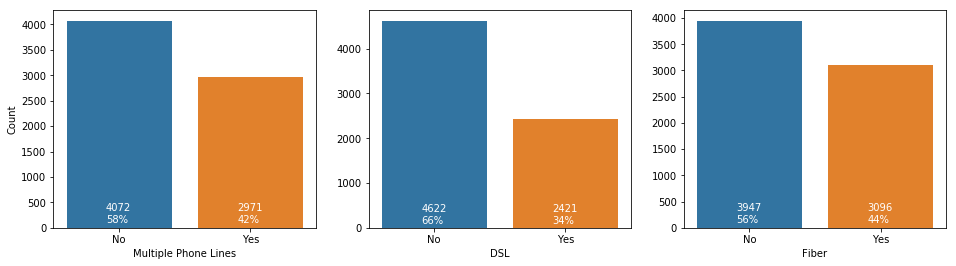

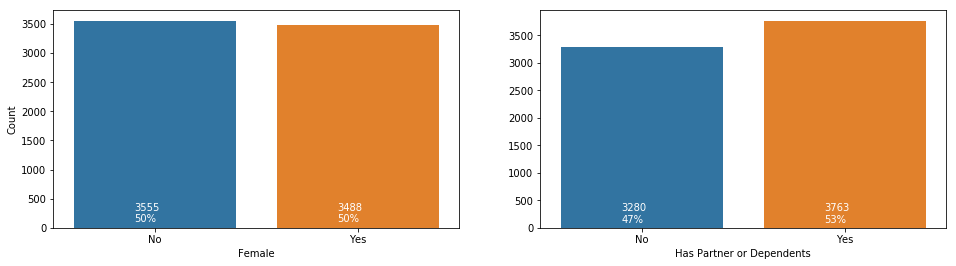

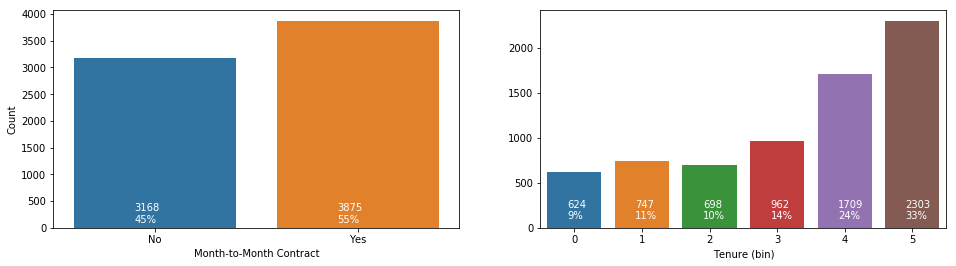

In [29]:
imbalanced_vars = ['senior', 'has_phone', 'contract_1y']
imbalanced_names = ['Senior Citizen', 'With Phone Service', 'Has 1-Year Contract']

billing_vars = ['paperless_bill', 'autopayment', 'mailed_check']
billing_names = ['Paperless Billing', 'Auto-Payment', 'Mailed Check']

internet_services_vars = ['online_security', 'online_backup', 'tech_support', 
                          'has_streaming', 'has_nonstreaming_services']
internet_services_names = ['Online Security', 'Online Backup', 'Tech Support', 
                          'Streaming Services', 'Non-Streaming Services']

phone_internet_vars = ['has_multiple_lines', 'dsl', 'fiber']
phone_internet_names = ['Multiple Phone Lines', 'DSL', 'Fiber']

customer_vars = ['female', 'has_partner_dependents']
customer_names = ['Female', 'Has Partner or Dependents']

contract_tenure_vars = ['m2m_contract', 'tenure_bin']
contract_tenure_names = ['Month-to-Month Contract', 'Tenure (bin)']

qualitative_vars = [[imbalanced_vars, imbalanced_names], [billing_vars, billing_names], 
                    [billing_vars, billing_names], [internet_services_vars, internet_services_names],
                    [phone_internet_vars, phone_internet_names], [customer_vars, customer_names], 
                    [contract_tenure_vars, contract_tenure_names]
                   ]

for var, name in qualitative_vars:
    plot_univariate_qualitative_vars(var, name)

##### Quantitative Variables

Summary statistics, histograms and boxplots are useful ways to explore quantitative variables. 

Distributions

- tenure: bimodal  
- Monthly charges: high frequency at the lower bound, and then the values beyond that entry point form a normally shaped curve.  
- Total charges: skewed left

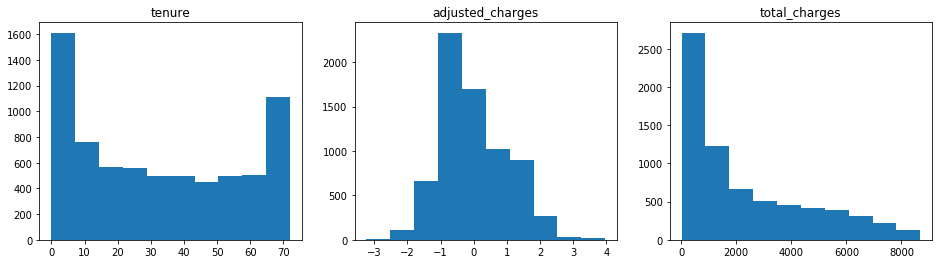

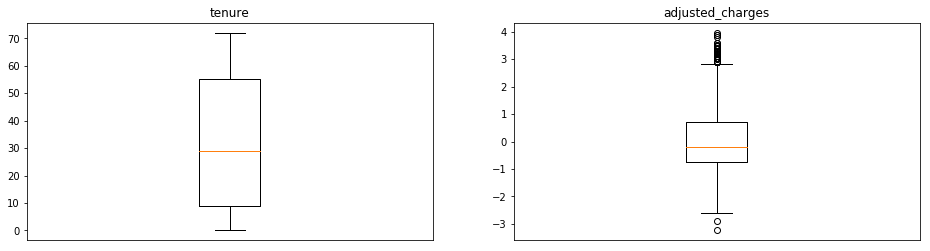

,tenure,adjusted_charges,total_charges
count,7043.000000,7.043000e+03,7032.000000
mean,32.371149,-1.435613e-15,2283.300441
std,24.559481,9.986500e-01,2266.771362
min,0.000000,-3.236465e+00,18.800000
25%,9.000000,-7.276985e-01,401.450000
50%,29.000000,-1.939940e-01,1397.475000
75%,55.000000,6.935930e-01,3794.737500
max,72.000000,3.961664e+00,8684.800000


In [30]:
numeric_vars = ['tenure', 'adjusted_charges', 'total_charges',]

def plot_numeric(numeric_vars):
    plt.figure(figsize=(16,4))
    for i in range(len(numeric_vars)):
        plt.subplot(1, 3, i+1)
        plt.hist(df[numeric_vars[i]])
        plt.title(numeric_vars[i])    
    plt.show()
    plt.figure(figsize=(16,4))
    for i in range(len(numeric_vars)-1):
        plt.subplot(1, 2, i+1)
        plt.boxplot(df[numeric_vars[i]])
        plt.title(numeric_vars[i])
        plt.xticks([])
    plt.show()

plot_numeric(numeric_vars)    
df[numeric_vars].describe()

#### Bivariate Statistics

Identify the distribution of variables using bivariate statistics from your cleaned and prepared data. Represent your findings visually as part of your submission.

##### Quantitative Variables 

In plotting the numeric variables, it is clear that the total charges are correlated with tenure, as expected. Becuase of this relationship, I removed total charges from the feature set. In addition, it is clear that the adjusted charges is independent of both tenure and total charges. 

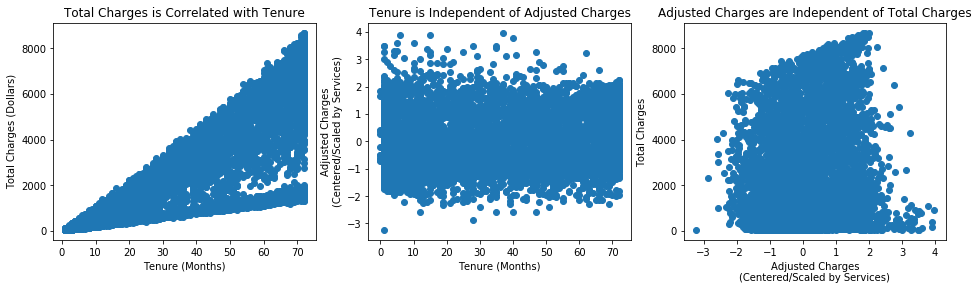

In [31]:
quantitative_vars = ['tenure', 'adjusted_charges', 'total_charges']

plt.figure(figsize=(16,4))
# plot tenure x total_charges
plt.subplot(1, 3, 1)
plt.scatter(df.tenure, df.total_charges)
plt.title("Total Charges is Correlated with Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Total Charges (Dollars)")

# plot tenure x adjusted_charges
plt.subplot(1, 3, 2)
plt.scatter(df.tenure, df.adjusted_charges)
plt.title("Tenure is Independent of Adjusted Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Adjusted Charges\n(Centered/Scaled by Services)")

# plot adjusted_charges x total_charges
plt.subplot(1, 3, 3)
plt.scatter(df.adjusted_charges, df.total_charges)
plt.title("Adjusted Charges are Independent of Total Charges")
plt.xlabel("Adjusted Charges\n(Centered/Scaled by Services)")
plt.ylabel("Total Charges")

plt.show()

##### Qualititative Variables

In [32]:
cat_vars = ['churn', 'paperless_bill', 'autopayment', 'mailed_check', 'm2m_contract', 'contract_1y', 
            'online_security', 'online_backup', 'tech_support', 'has_streaming', 'has_nonstreaming_services', 
            'has_phone', 'has_multiple_lines', 'dsl', 'fiber', 'senior', 'female', 'has_partner_dependents'
           ]
cat_names = ['Churn', 'Paperless Billing', 'Auto-Payment', 'Mailed Check', 'Month-to-Month Contract', 
             '1-Year Contract', 'Online Security', 'Online Backup', 'Tech Support', 
             'Streaming Services', 'Non-Streaming Services', 'Phone Service', 'Multiple Phone Lines', 
             'DSL', 'Fiber', 'Senior Citizen', 'Female', 'Has Partner or Dependents'
            ]

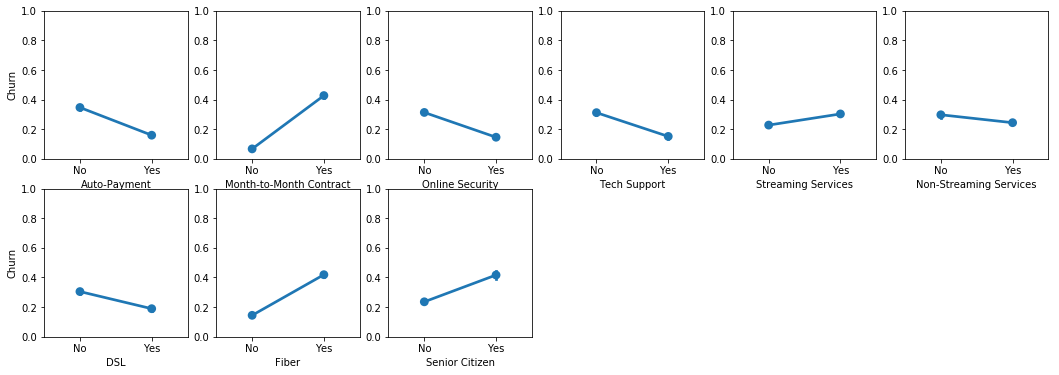

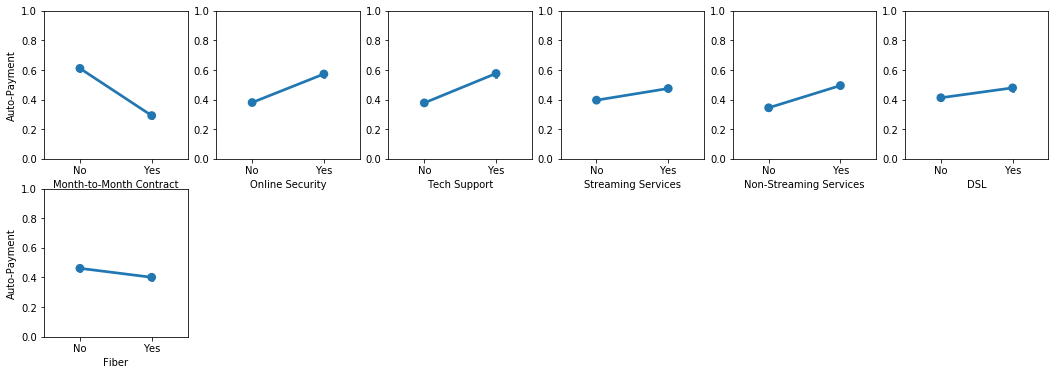

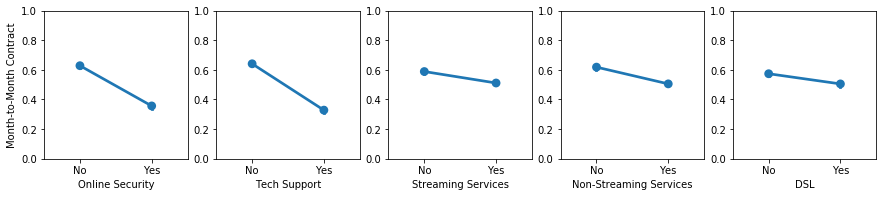

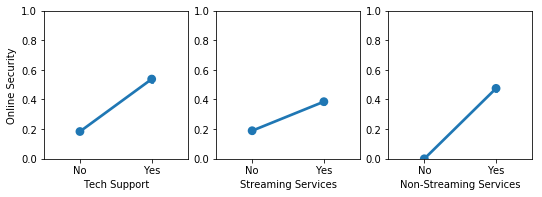

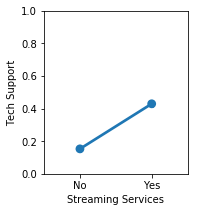

<Figure size 1296x216 with 0 Axes>

<Figure size 1296x216 with 0 Axes>

<Figure size 1296x216 with 0 Axes>

<Figure size 1296x216 with 0 Axes>

<Figure size 1296x216 with 0 Axes>

In [33]:
cat_vars = ['churn', 'autopayment', 'm2m_contract', 'online_security', 'tech_support', 
            'has_streaming', 'has_nonstreaming_services', 'dsl', 'fiber', 
            'senior', 'has_partner_dependents'
           ]
cat_names = ['Churn', 'Auto-Payment', 'Month-to-Month Contract', 'Online Security', 'Tech Support', 
             'Streaming Services', 'Non-Streaming Services', 'DSL', 'Fiber', 
             'Senior Citizen', 'Female', 'Has Partner or Dependents'
            ]

def plot_cat_vs_rest(cat_vars):
    y_vars = cat_vars[:-1]
    y_names = cat_names[:-1]
    for yi in range(len(y_vars)):
        x_vars = cat_vars[yi+1:]
        x_names = cat_names[yi+1:]
        rows = int(np.ceil(len(x_vars)/6))
        plt.figure(figsize=(18,rows*3))
        for i in range(0,rows):
            for j in range(0,6):
                if 6*i+j < len(x_vars[yi+1:]):
                    plt.subplot(rows, 6, 6*i+j+1)
                    sns.pointplot(x=x_vars[6*i+j], y=y_vars[yi], data=df)
                    plt.ylim(0, 1)
                    if j==0:
                        plt.ylabel(y_names[yi])
                    else:
                        plt.ylabel('')
                    loc, labels = plt.xticks()
                    if len(labels) == 2:
                        plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
                    plt.xlabel(x_names[6*i+j])
                else:
                    break
        plt.show()

plot_cat_vs_rest(cat_vars)

In [34]:
for i in range(len(cat_vars)-1):
    for j in range(1,len(cat_vars)):
        if i < j:
            ct = pd.crosstab(df[cat_vars[i]], df[cat_vars[j]]).apply(lambda r: round(r/r.sum(), 2), axis=1)
            print(ct)
            print("")

autopayment     0     1
churn                  
False        0.50  0.50
True         0.74  0.26

m2m_contract     0     1
churn                   
False         0.57  0.43
True          0.11  0.89

online_security     0     1
churn                      
False            0.67  0.33
True             0.84  0.16

tech_support     0     1
churn                   
False         0.66  0.34
True          0.83  0.17

has_streaming     0     1
churn                    
False          0.53  0.47
True           0.43  0.57

has_nonstreaming_services     0     1
churn                                
False                      0.38  0.62
True                       0.44  0.56

dsl       0     1
churn            
False  0.62  0.38
True   0.75  0.25

fiber     0     1
churn            
False  0.65  0.35
True   0.31  0.69

senior     0     1
churn             
False   0.87  0.13
True    0.75  0.25

has_partner_dependents     0     1
churn                             
False                   0.42  0.58
Tr

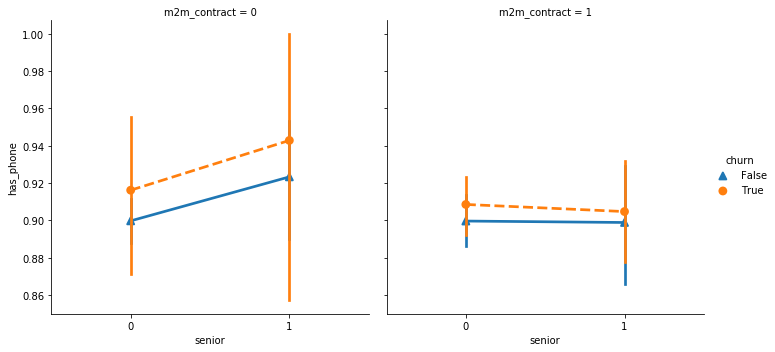

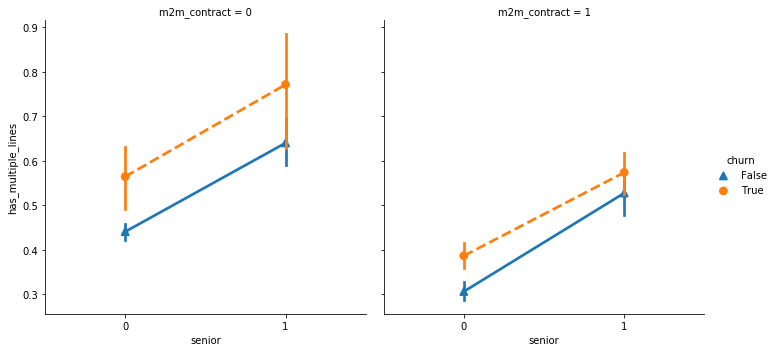

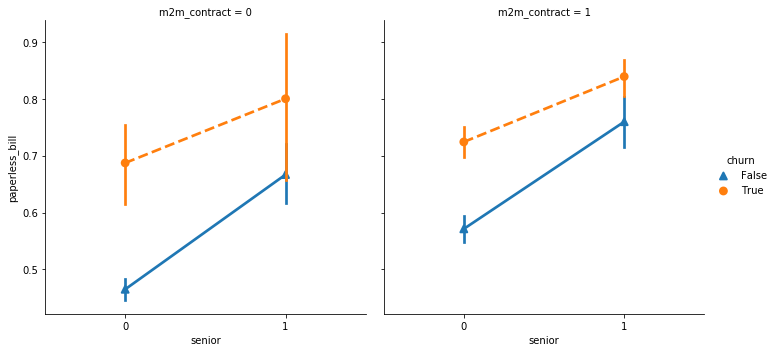

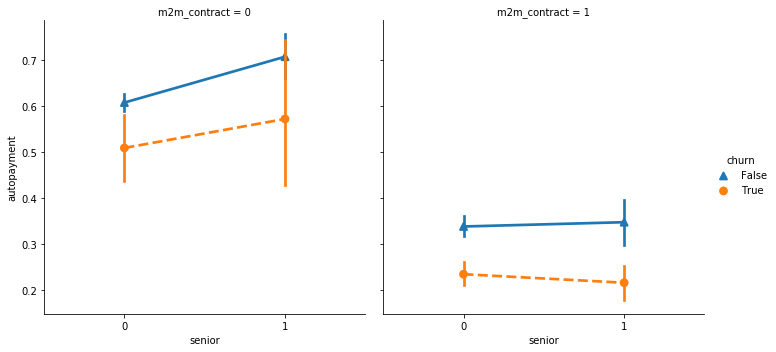

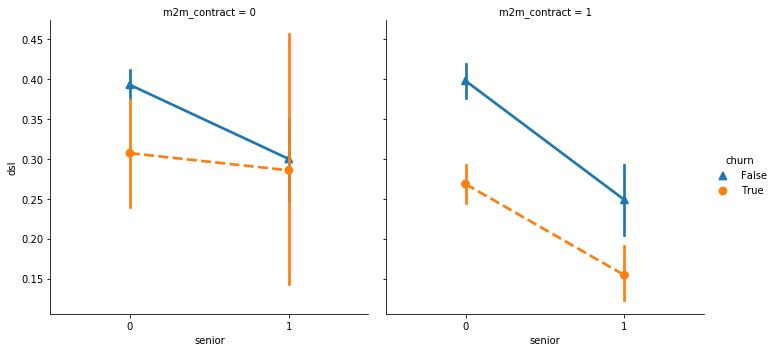

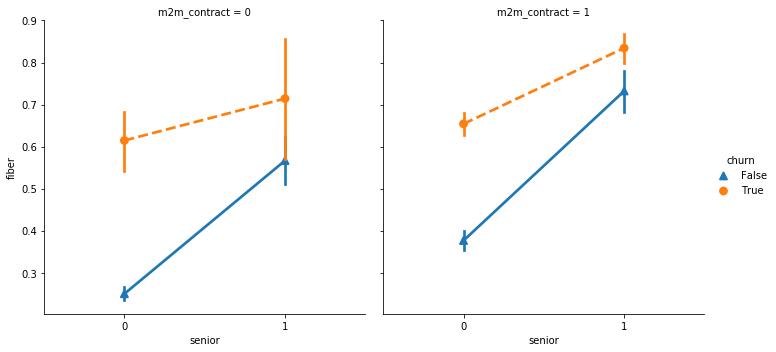

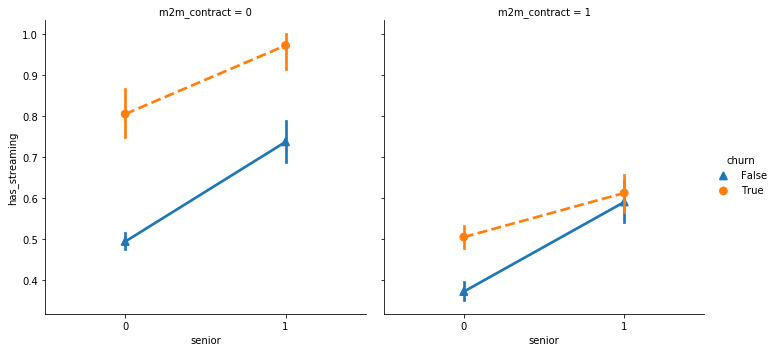

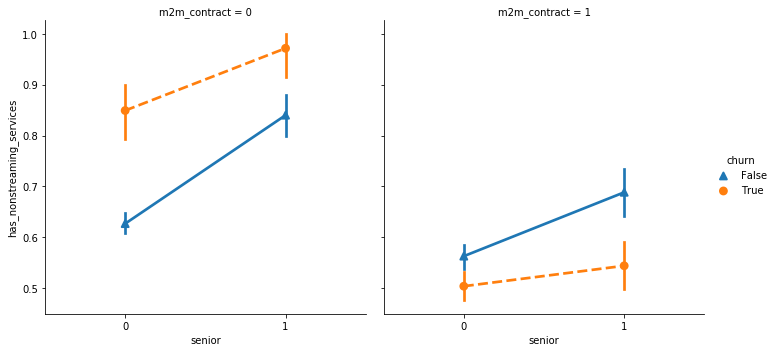

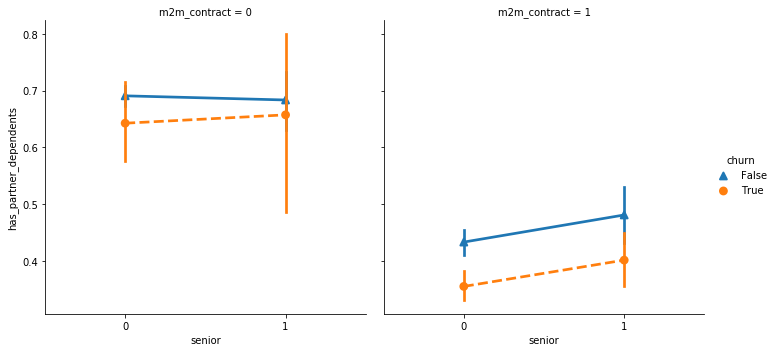

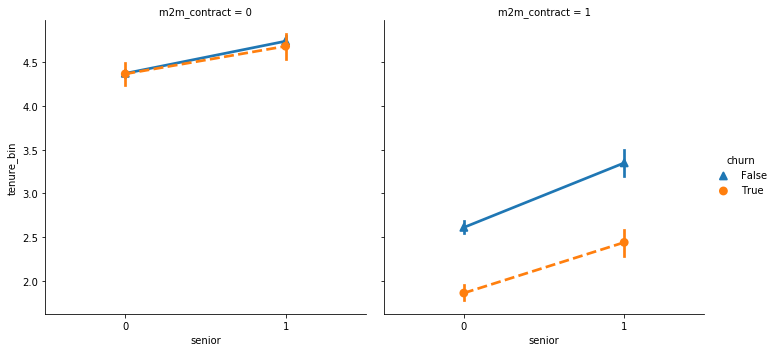

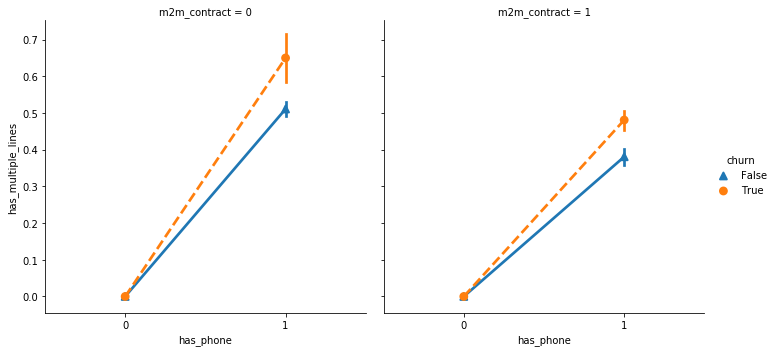

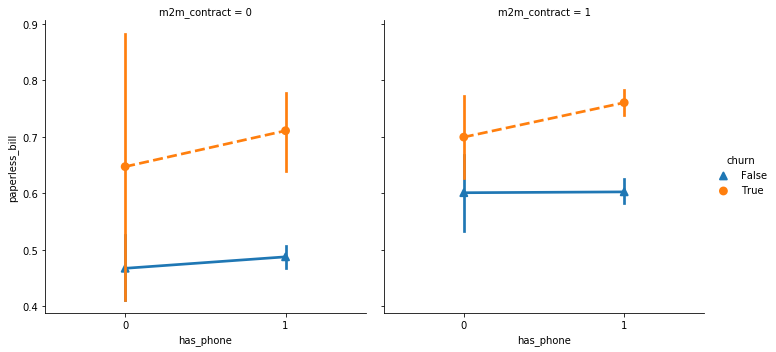

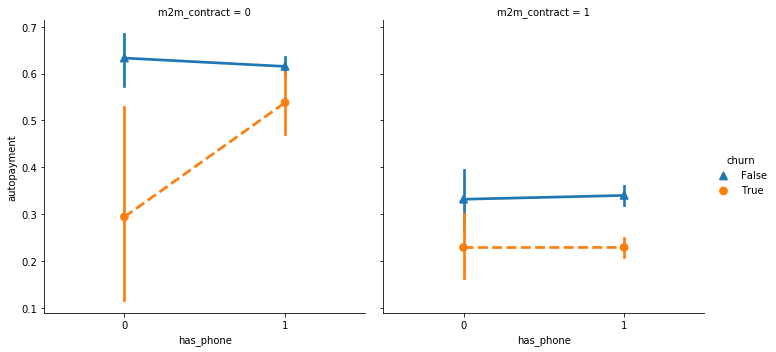

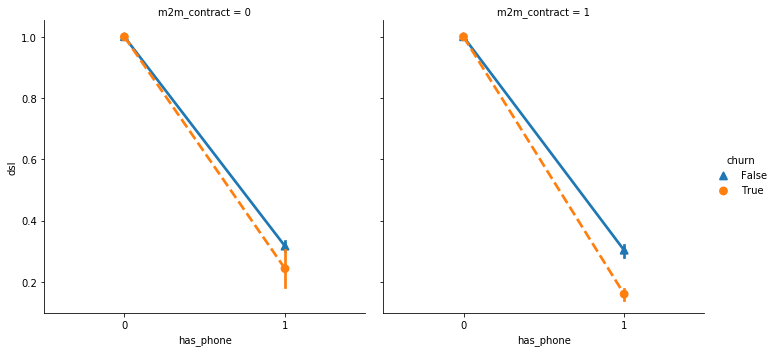

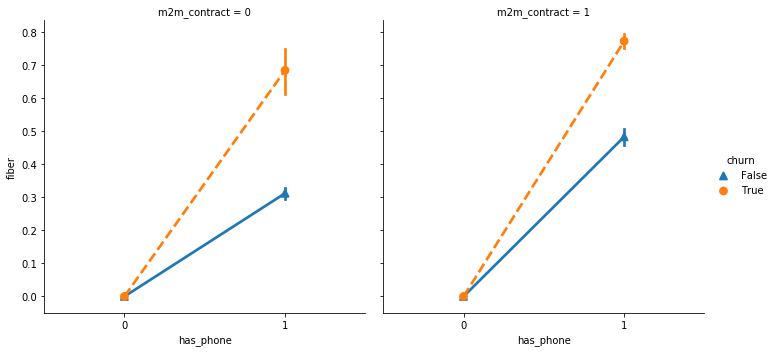

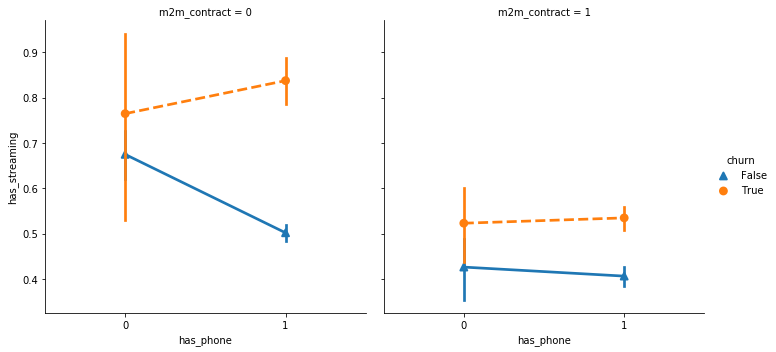

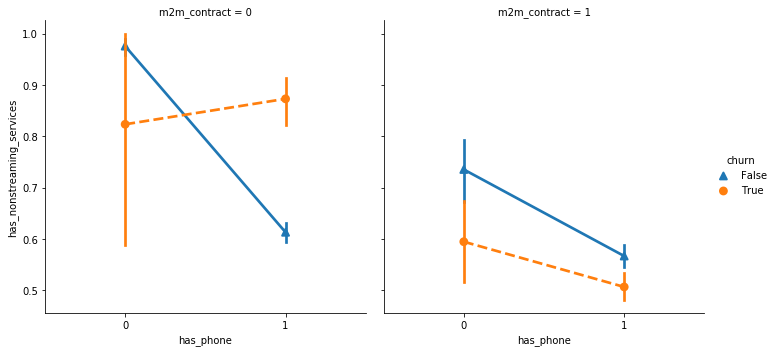

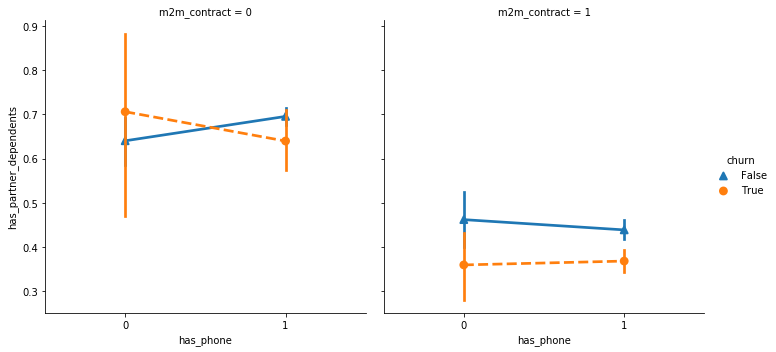

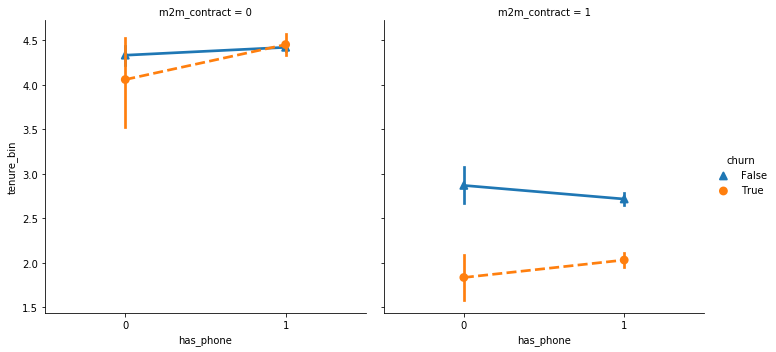

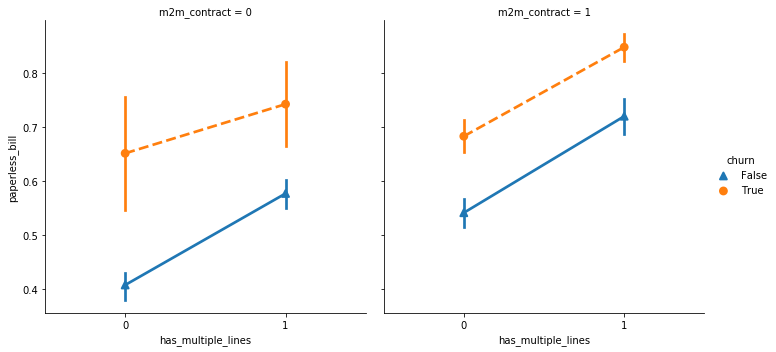

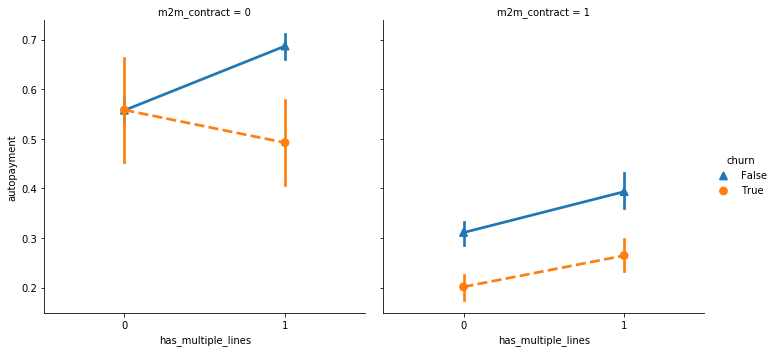

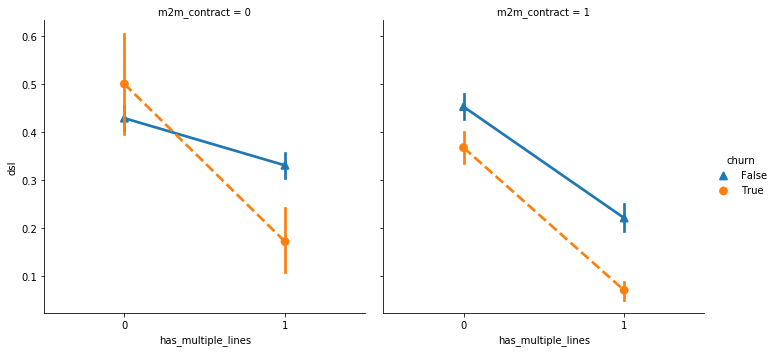

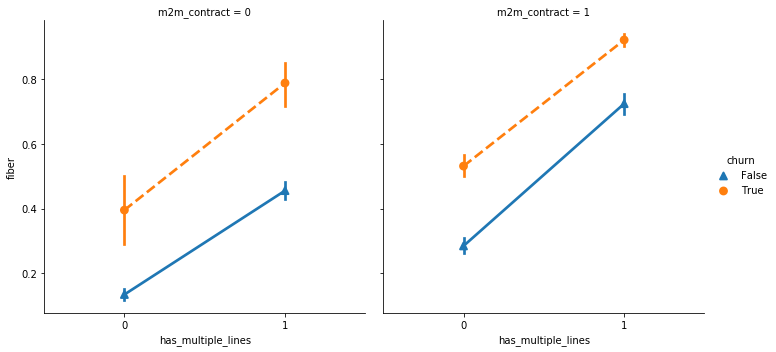

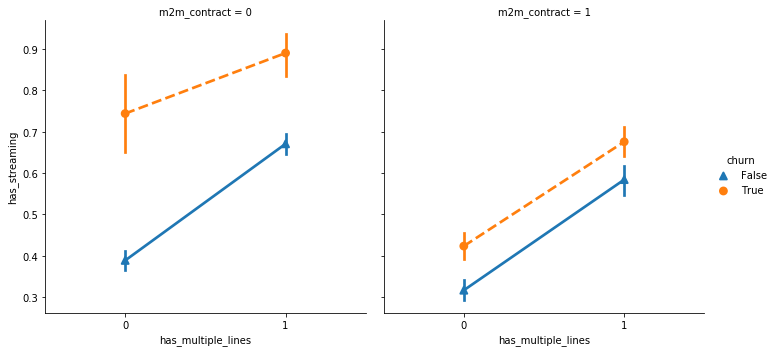

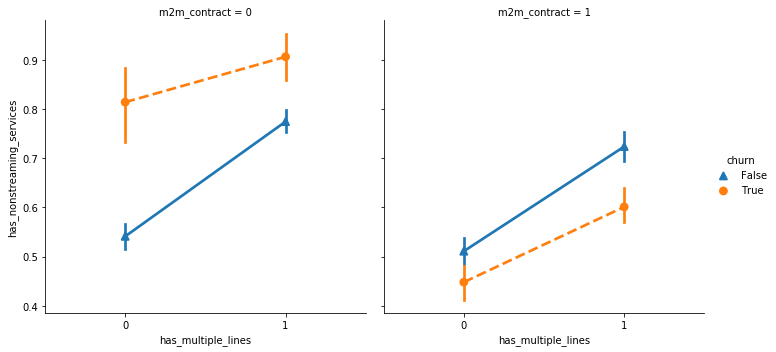

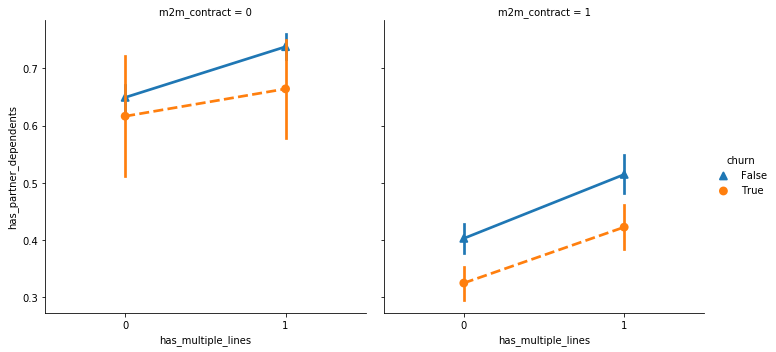

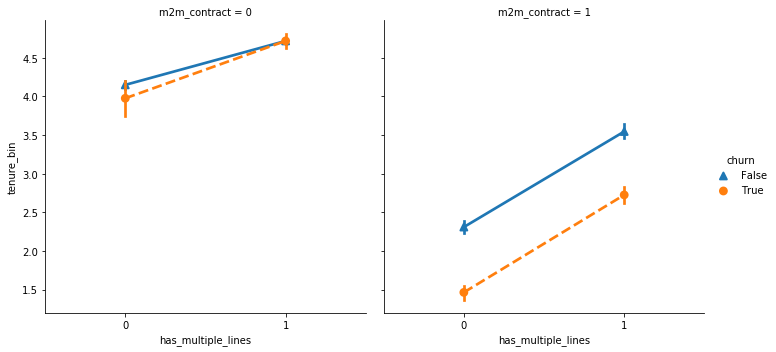

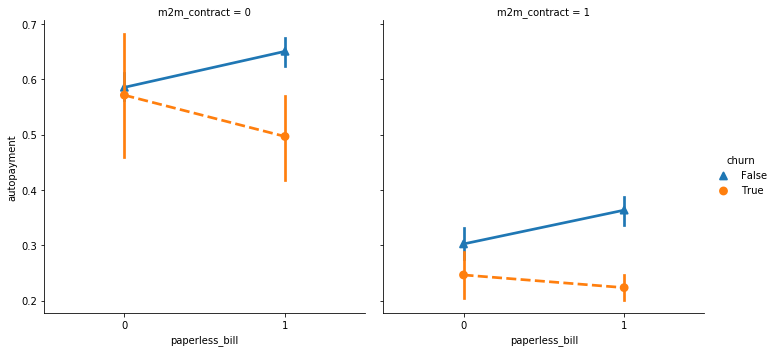

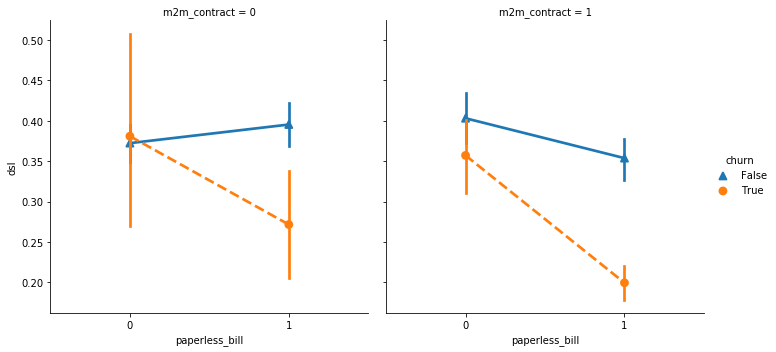

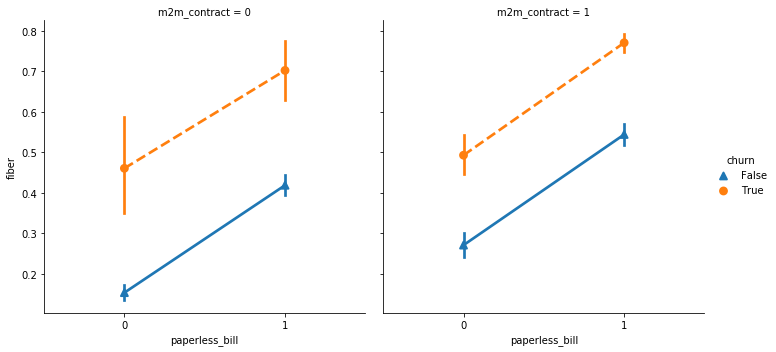

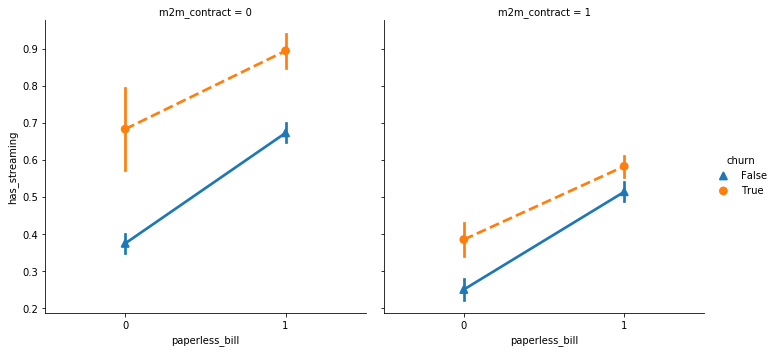

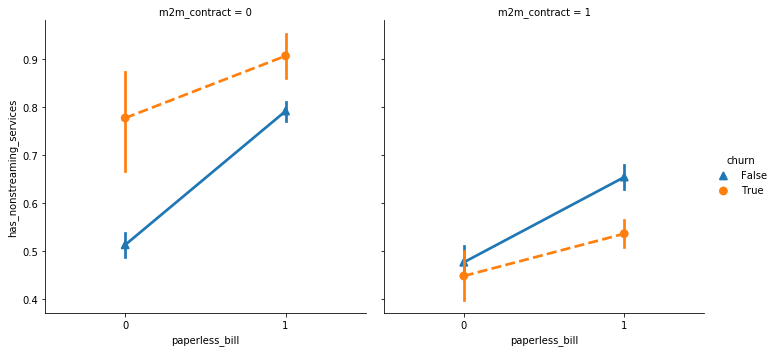

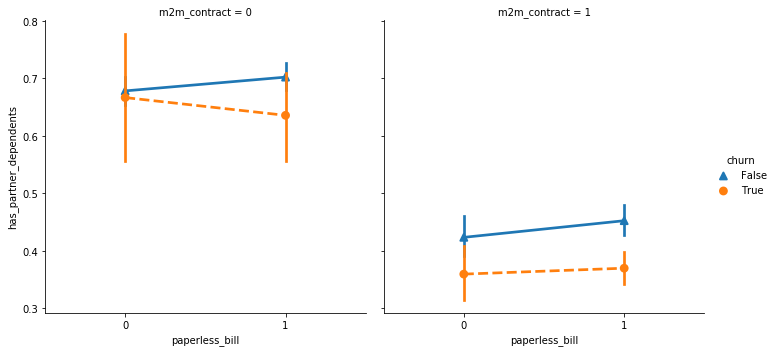

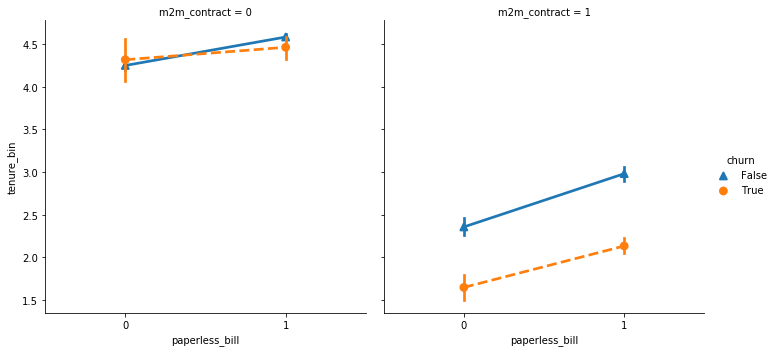

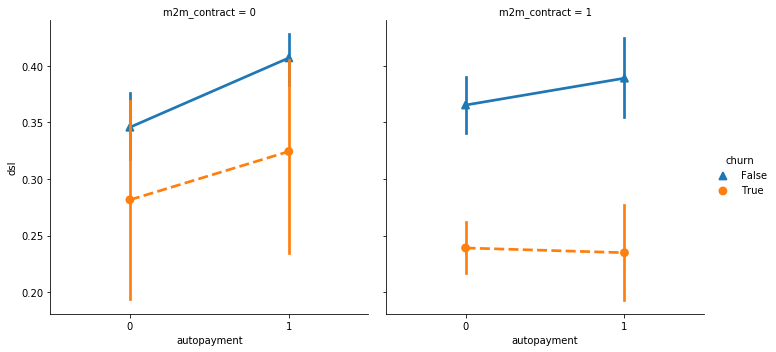

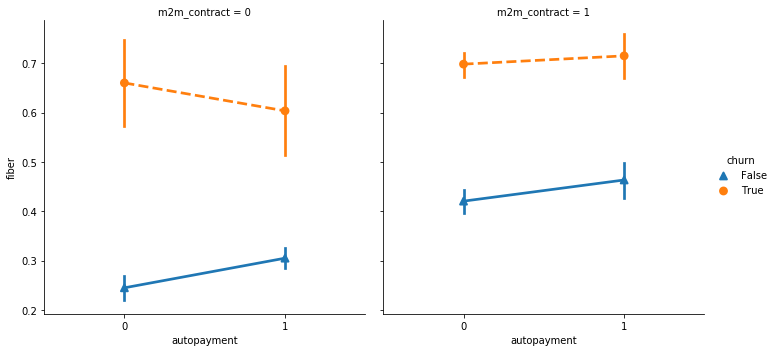

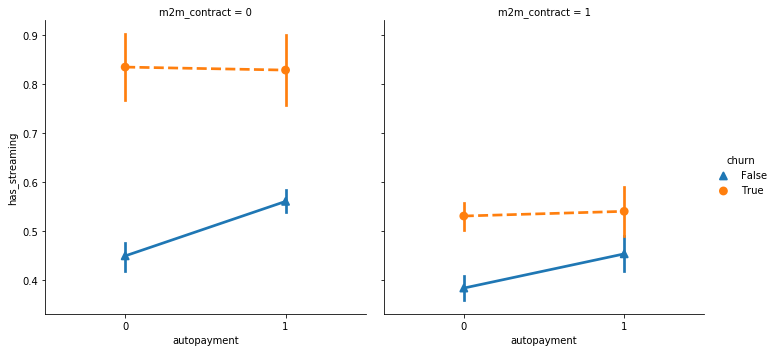

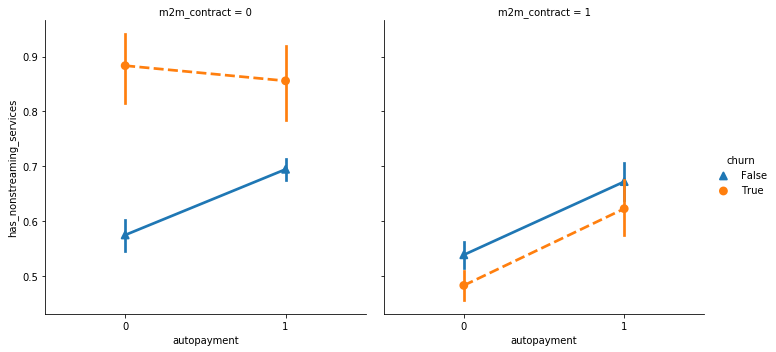

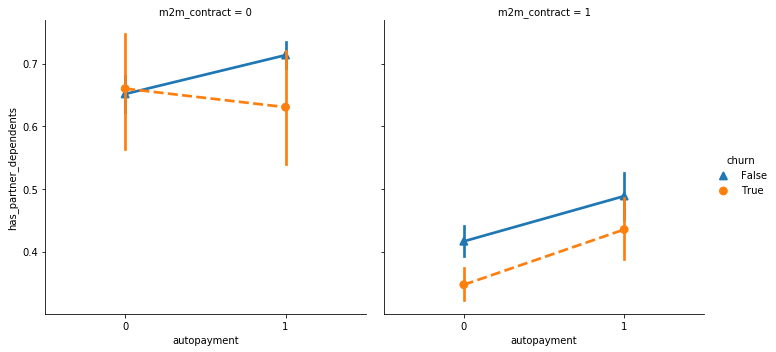

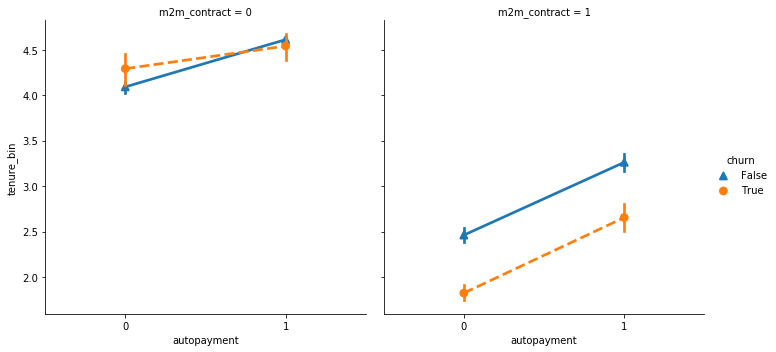

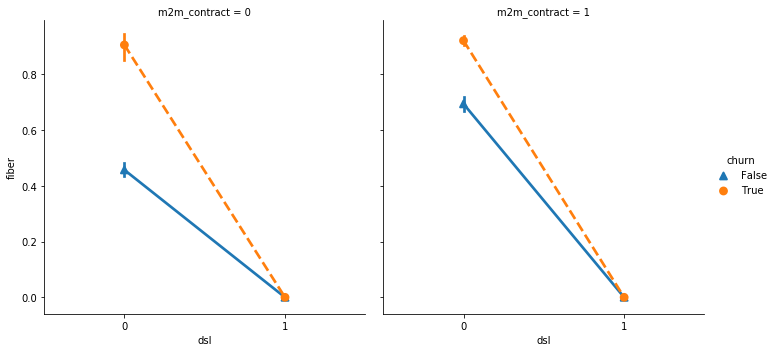

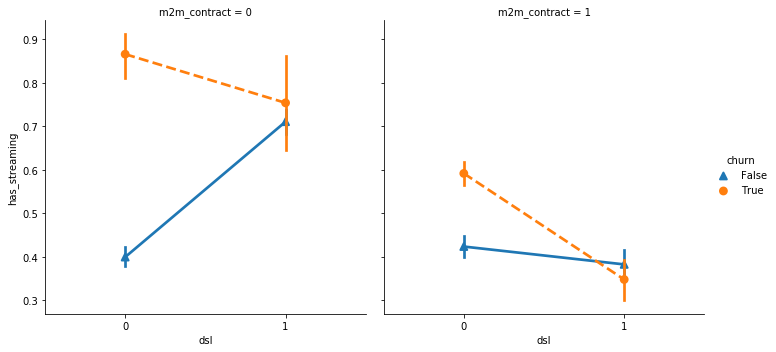

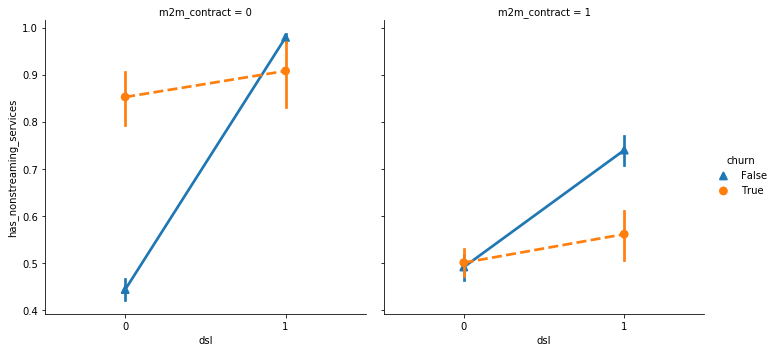

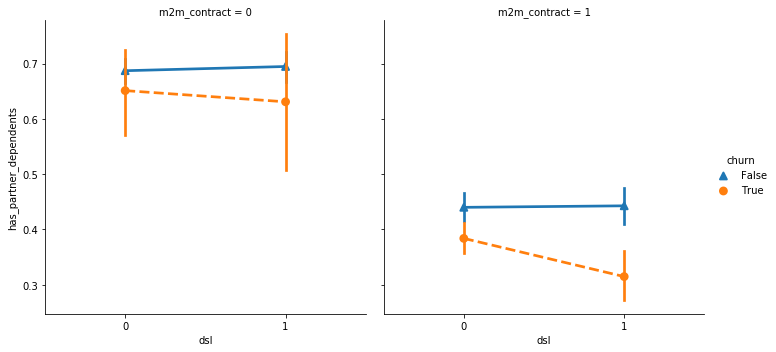

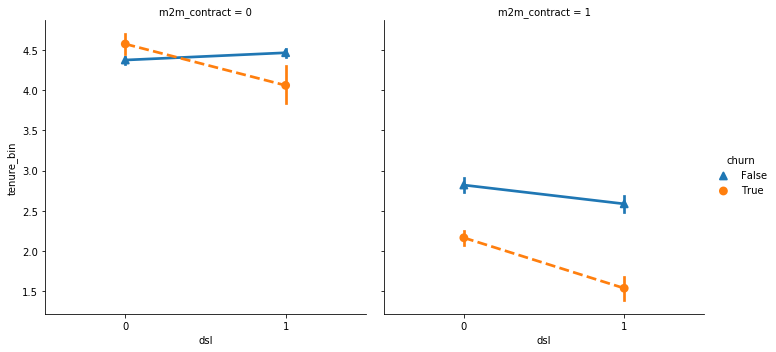

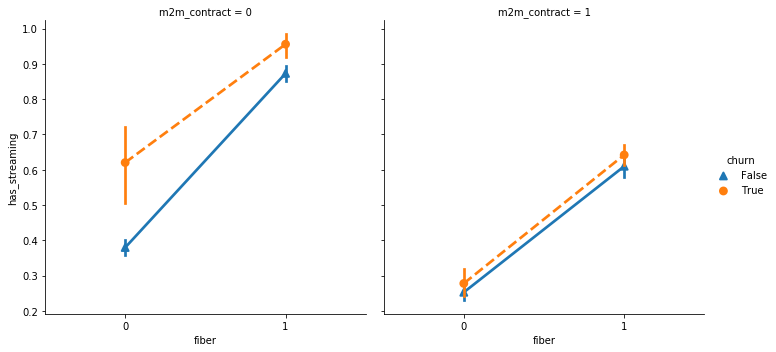

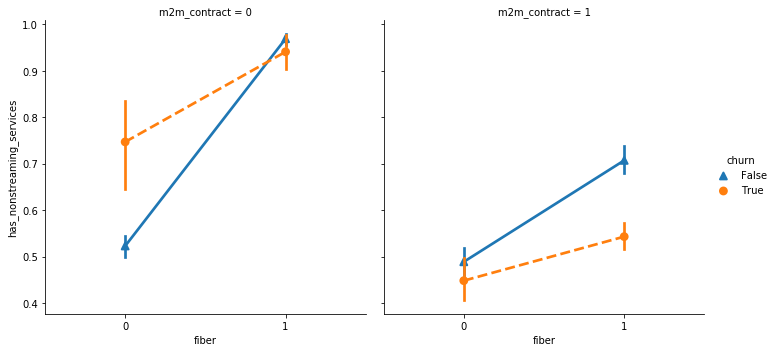

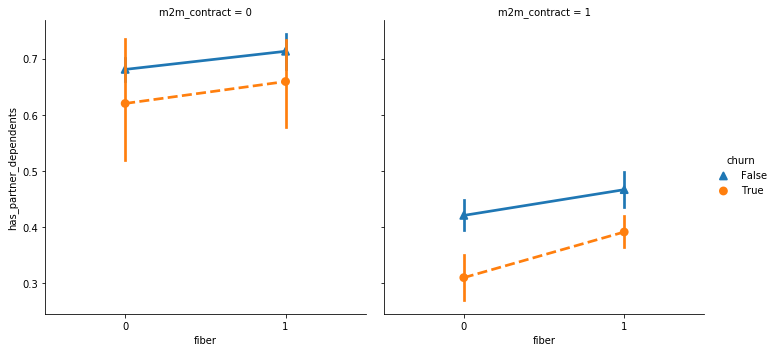

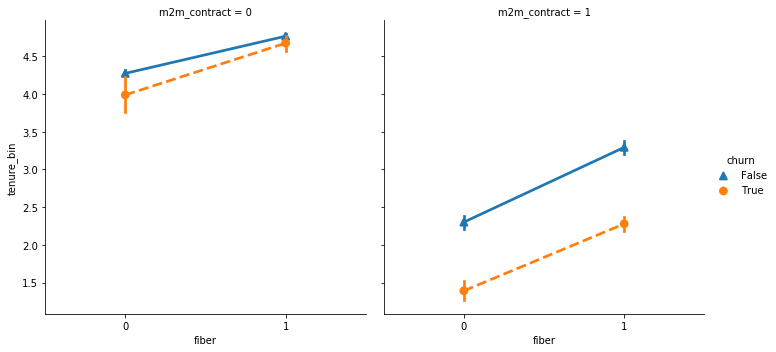

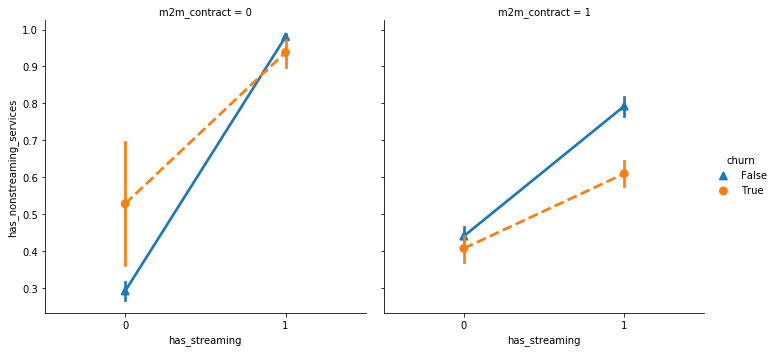

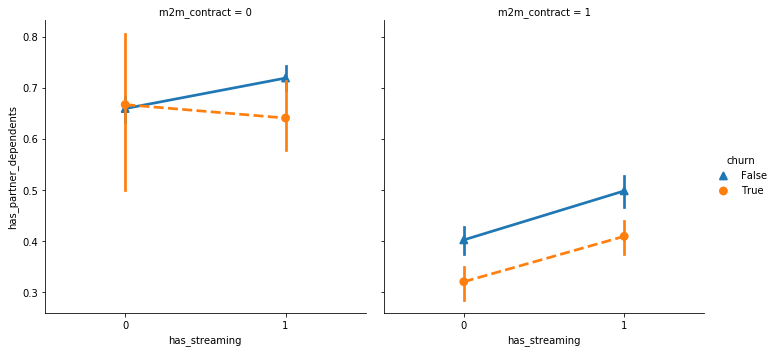

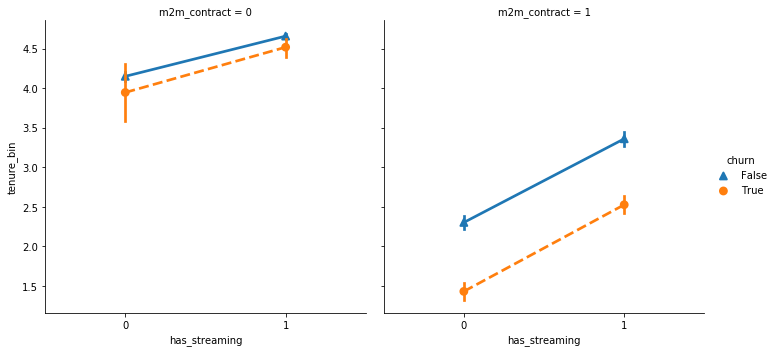

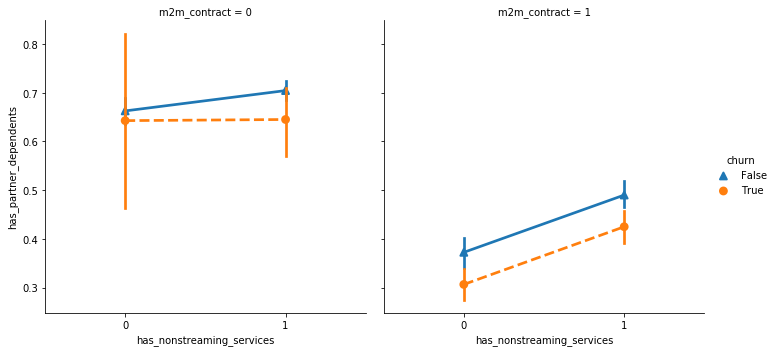

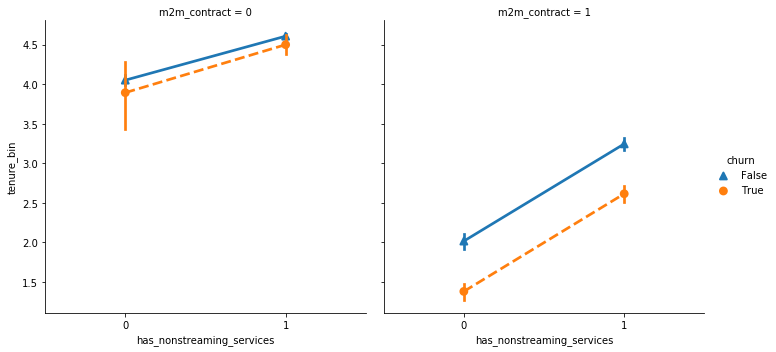

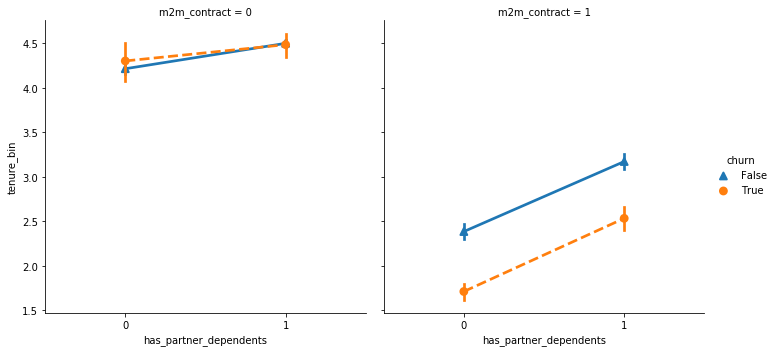

In [35]:
categorical_vars = ['senior', 'has_phone', 'has_multiple_lines', 'paperless_bill', 'autopayment',
                    'dsl', 'fiber', 'has_streaming', 'has_nonstreaming_services', 
                    'has_partner_dependents', 'tenure_bin']

for i in range(len(categorical_vars)-1):
    for j in range(i+1,len(categorical_vars)):
        if i>=j:
            continue
        else:
            sns.catplot(x=categorical_vars[i], y=categorical_vars[j], hue="churn", col="m2m_contract", 
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=df)

##### Quantitative vs. Qualitative Variables

<Figure size 1152x288 with 0 Axes>

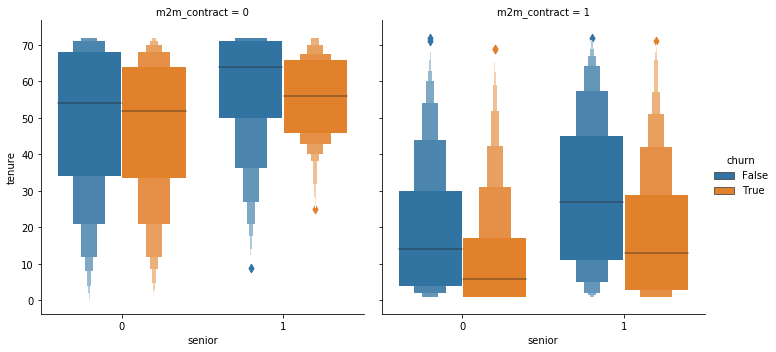

<Figure size 1152x288 with 0 Axes>

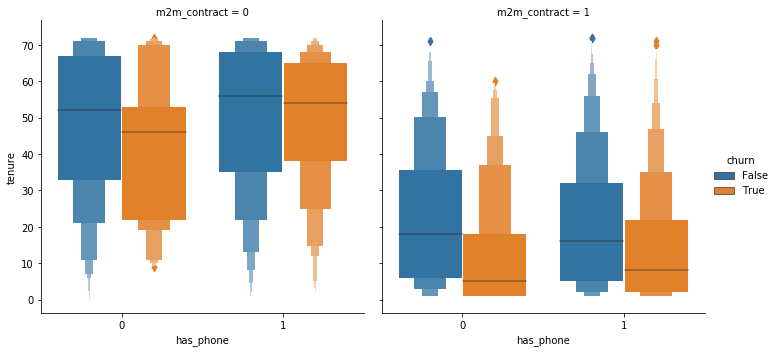

<Figure size 1152x288 with 0 Axes>

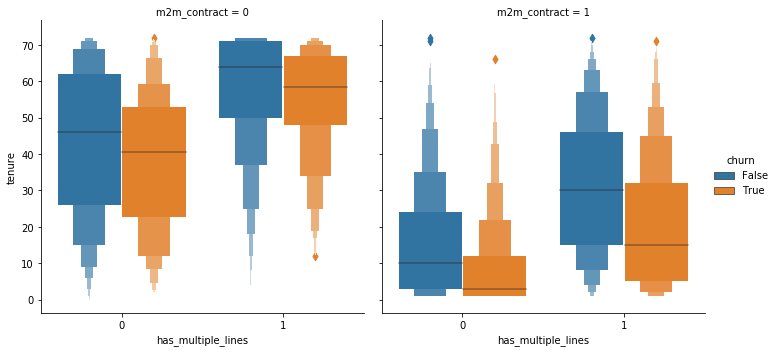

<Figure size 1152x288 with 0 Axes>

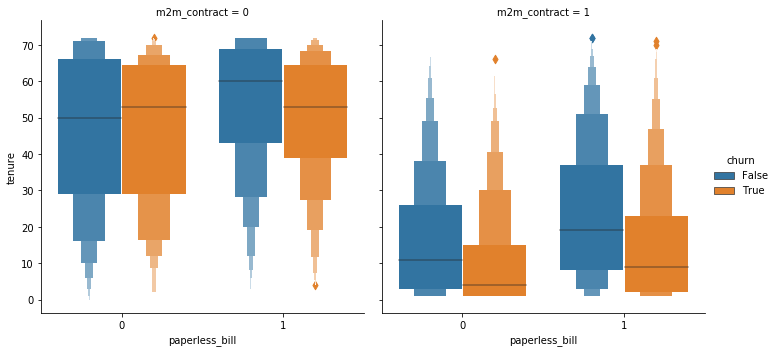

<Figure size 1152x288 with 0 Axes>

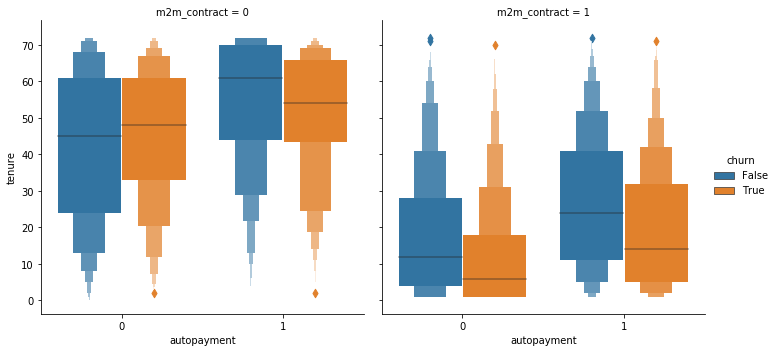

<Figure size 1152x288 with 0 Axes>

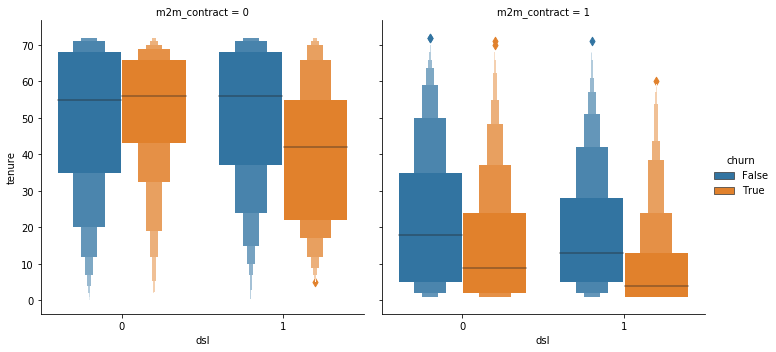

<Figure size 1152x288 with 0 Axes>

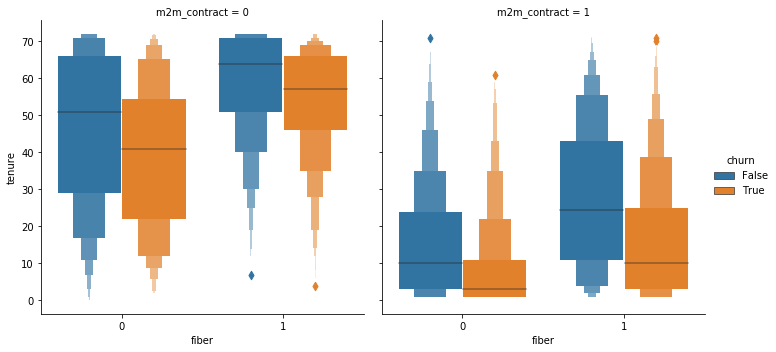

<Figure size 1152x288 with 0 Axes>

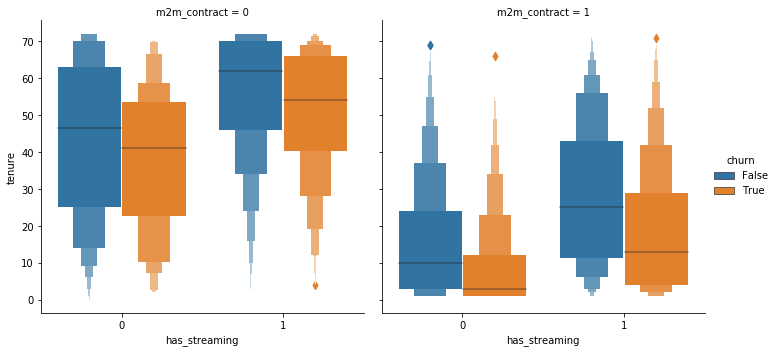

<Figure size 1152x288 with 0 Axes>

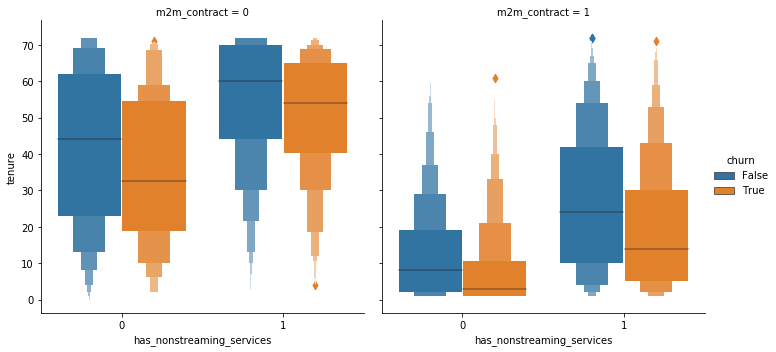

<Figure size 1152x288 with 0 Axes>

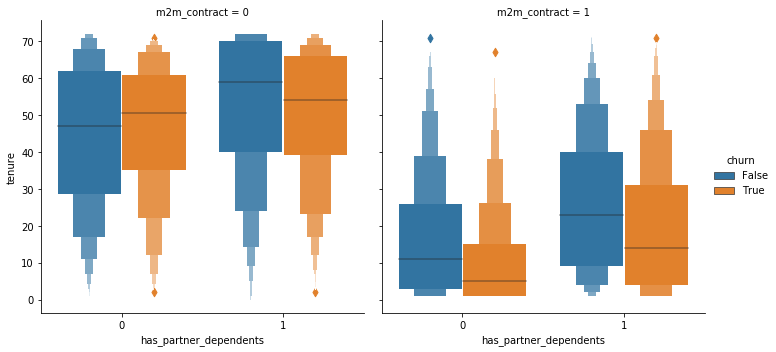

<Figure size 1152x288 with 0 Axes>

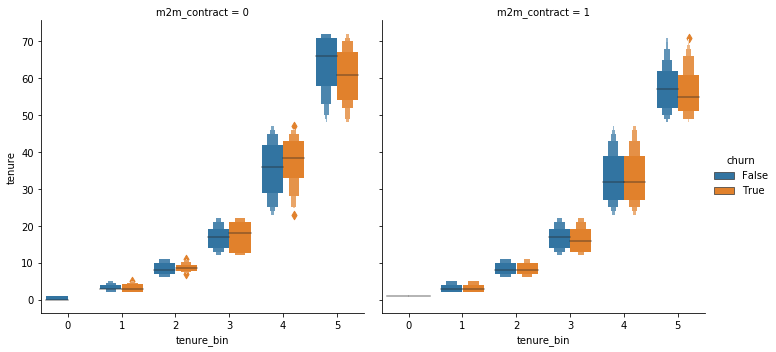

<Figure size 1152x288 with 0 Axes>

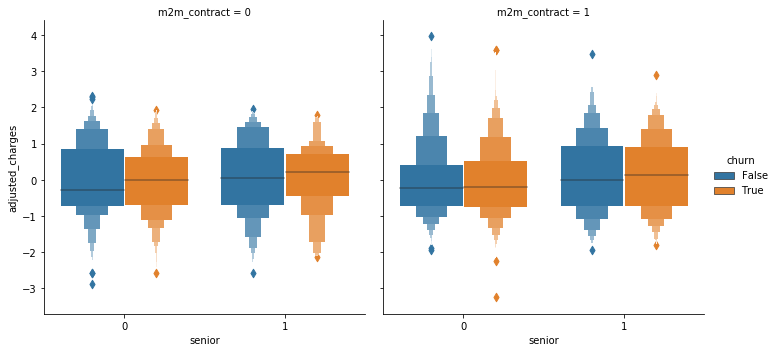

<Figure size 1152x288 with 0 Axes>

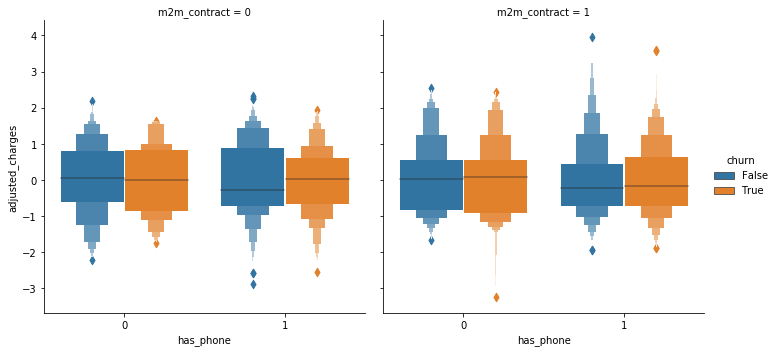

<Figure size 1152x288 with 0 Axes>

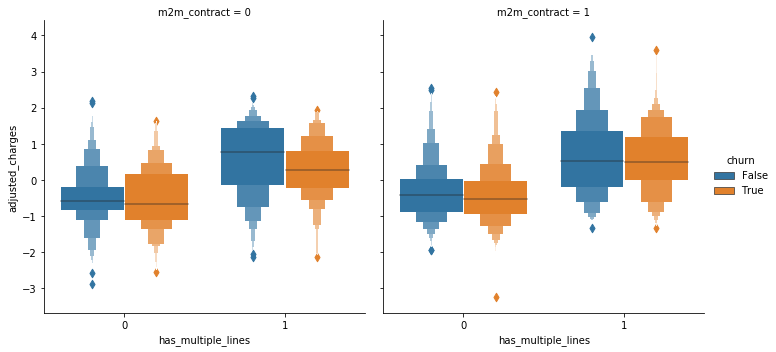

<Figure size 1152x288 with 0 Axes>

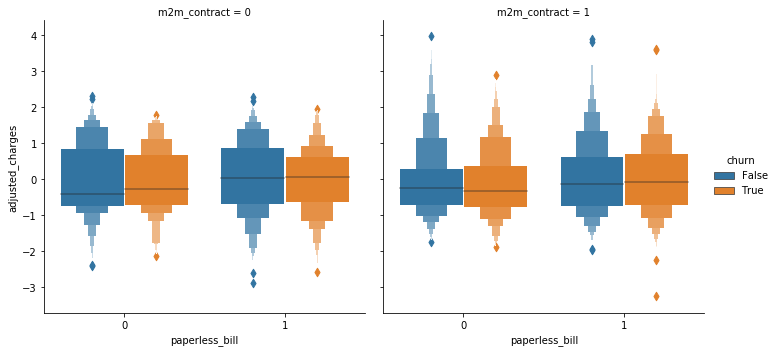

<Figure size 1152x288 with 0 Axes>

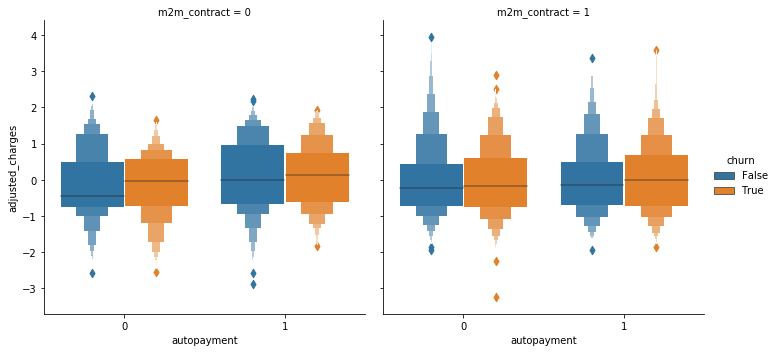

<Figure size 1152x288 with 0 Axes>

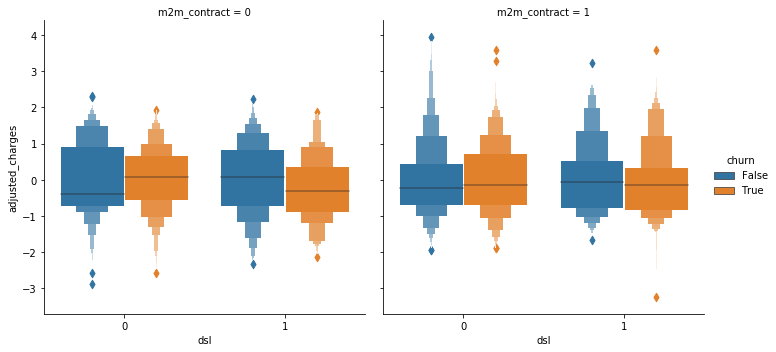

<Figure size 1152x288 with 0 Axes>

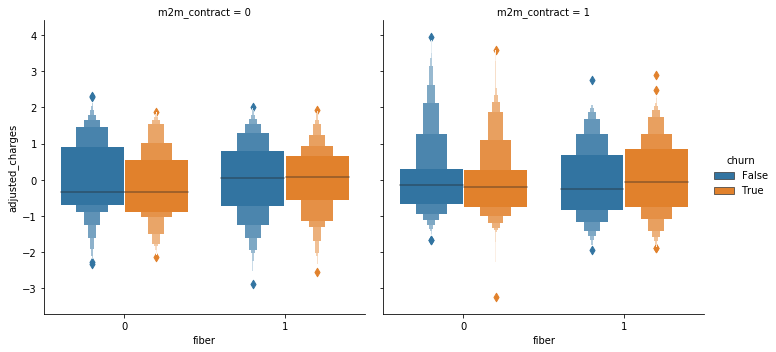

<Figure size 1152x288 with 0 Axes>

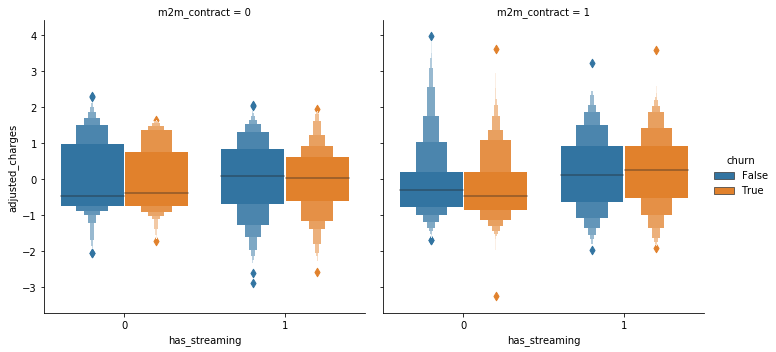

<Figure size 1152x288 with 0 Axes>

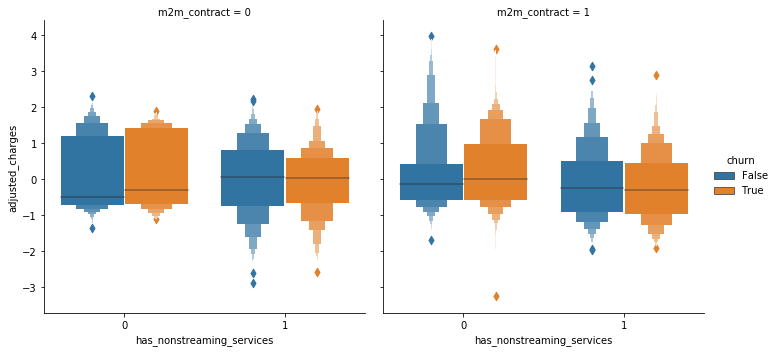

<Figure size 1152x288 with 0 Axes>

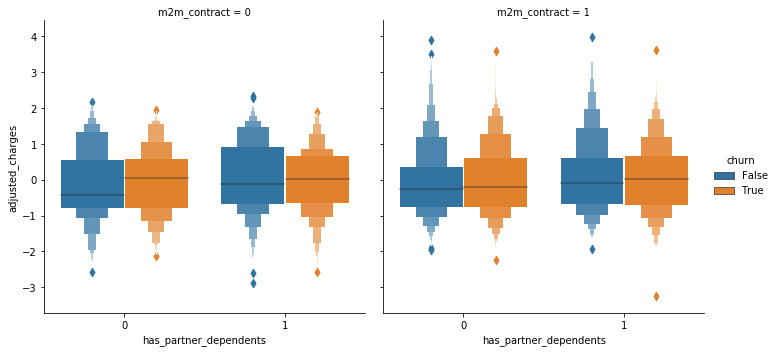

<Figure size 1152x288 with 0 Axes>

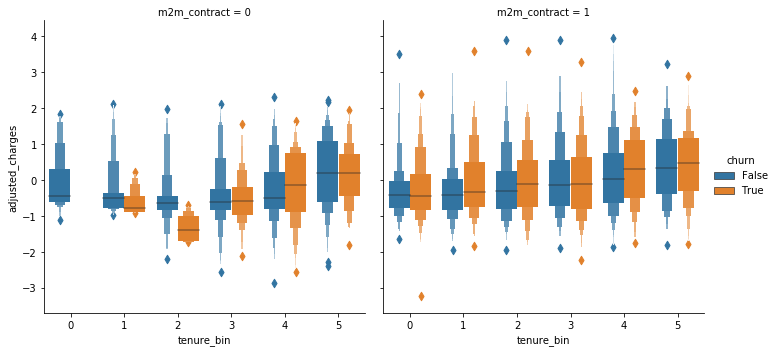

In [36]:
categorical_vars = ['senior', 'has_phone', 'has_multiple_lines', 'paperless_bill', 'autopayment',
                    'dsl', 'fiber', 'has_streaming', 'has_nonstreaming_services', 
                    'has_partner_dependents', 'tenure_bin']

numeric_vars = ['tenure', 'adjusted_charges']

target_var = 'churn'

for num in numeric_vars:
    for cat in categorical_vars:
        plt.figure(figsize=(16,4))
        sns.catplot(x=cat, y=num, hue="churn", col="m2m_contract", kind="boxen", data=df)
        plt.show()

#### Methods

Apply an analytic method and an evaluative method. Annotate the data showing both methods and your findings.

First, split data into train, validate, and test

In [91]:
from sklearn.model_selection import train_test_split

train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.churn)

##### Combinatory models

clustering by aggregation of similarities

In [92]:
# cluster by similar internet plans
internet_plan_cols = ['fiber', 'has_streaming', 'has_nonstreaming_services']

services_df = df.groupby(internet_plan_cols)['churn'].count().reset_index().reset_index().drop(columns=['churn'])

services_df.columns = ['cluster_id', 'fiber', 'has_streaming', 'has_nonstreaming_services']

services_df['cluster_desc'] = ['no fiber or extra services', 
                               'non-streaming services only', 
                               'streaming services only', 
                               'extra services only',
                               'fiber only', 
                               'fiber & non-streaming services only', 
                               'fiber & streaming services only',
                               'fiber & extra services'
                              ]

train = train.merge(services_df, on=internet_plan_cols, how='left')
validate = validate.merge(services_df, on=internet_plan_cols, how='left')
test = test.merge(services_df, on=internet_plan_cols, how='left')

In [93]:
pd.DataFrame(train.groupby(['cluster_desc', 'cluster_id', 'fiber', 'has_streaming', 
                            'has_nonstreaming_services'])['churn'].mean())

,,,,,churn
cluster_desc,cluster_id,fiber,has_streaming,has_nonstreaming_services,
extra services only,3,0,1,1,0.107511
fiber & extra services,7,1,1,1,0.329437
fiber & non-streaming services only,5,1,0,1,0.377698
fiber & streaming services only,6,1,1,0,0.669291
fiber only,4,1,0,0,0.617778
no fiber or extra services,0,0,0,0,0.125483
non-streaming services only,1,0,0,1,0.183406
streaming services only,2,0,1,0,0.486111


##### Is there a significant difference between the observed and expected frequencies of churn and type (or lack of) contract?

Yes, customers on a month-to-month plan (no contract) are significantly more likely to churn than those on a one- or two-year contract. 

In [94]:
observed = pd.crosstab(train['churn'], train['m2m_contract'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print("chi2: ", chi2)
print("p-value: ", p)
print("degrees of freedom: ", degf)
print("observed:\n", observed)
print("expected:\n", expected)

chi2:  660.6943971584062
p-value:  1.055162705901504e-145
degrees of freedom:  1
observed:
 m2m_contract     0     1
churn                   
False         1635  1262
True           108   938
expected:
 [[1280.61653563 1616.38346437]
 [ 462.38346437  583.61653563]]


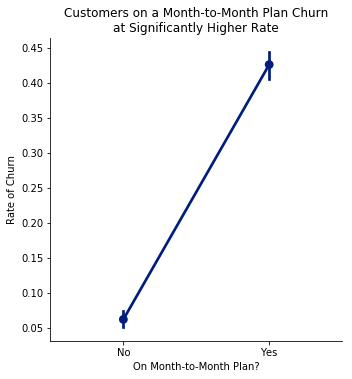

In [95]:
sns.catplot(x='m2m_contract', y='churn', kind="point", data=train)
plt.title('Customers on a Month-to-Month Plan Churn\nat Significantly Higher Rate')
plt.xlabel('On Month-to-Month Plan?')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Rate of Churn')
plt.show()

##### Is there a significant difference between the observed and expected frequencies of churn and customers' internet plan?

After analysis of the relationship of each cluster of internet plans to churn, I found that fiber service is the strongest driver of churn. Adding streaming services to the plan, further increases the likelihood. Non-streaming services is related to lower churn rates; however, fiber is a stronger driver than non-streaming services. So customers with fiber and non-streaming services are more likely to churn, those with non-streaming services only are less likely to churn. Non-streaming services appears to be a stronger driver than streaming services, meaning that customers with both non-streaming and streaming services (without fiber) are less likely to churn. 

In [96]:
train = pd.get_dummies(train, prefix=[None], columns=['cluster_desc'])
validate = pd.get_dummies(validate, prefix=[None], columns=['cluster_desc'])
test = pd.get_dummies(test, prefix=[None], columns=['cluster_desc'])

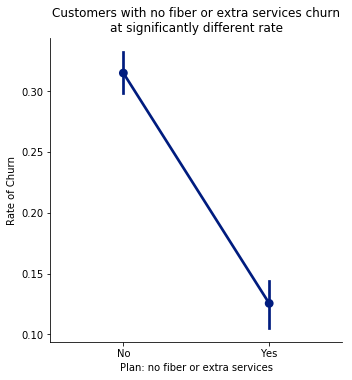

Plan: no fiber or extra services
chi2:  139.9299203605138 ; p-value:  2.757646332309368e-32
observed:
 no fiber or extra services     0    1
churn                                
False                       1991  906
True                         916  130
expected:
 [[2135.83033223  761.16966777]
 [ 771.16966777  274.83033223]]
_______________________________________________________________


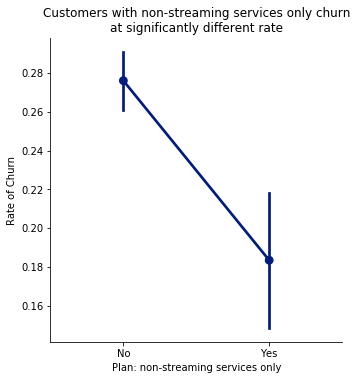

Plan: non-streaming services only
chi2:  17.349886552518647 ; p-value:  3.109168297066389e-05
observed:
 non-streaming services only     0    1
churn                                 
False                        2523  374
True                          962   84
expected:
 [[2560.49835151  336.50164849]
 [ 924.50164849  121.49835151]]
_______________________________________________________________


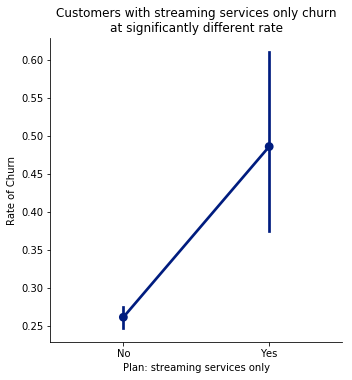

Plan: streaming services only
chi2:  17.21376668828941 ; p-value:  3.340071598353264e-05
observed:
 streaming services only     0   1
churn                            
False                    2860  37
True                     1011  35
expected:
 [[2844.10017753   52.89982247]
 [1026.89982247   19.10017753]]
_______________________________________________________________


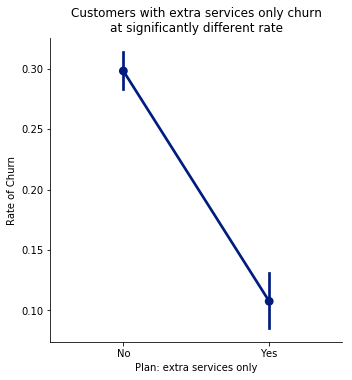

Plan: extra services only
chi2:  103.77688716908588 ; p-value:  2.2643129885637916e-24
observed:
 extra services only     0    1
churn                         
False                2291  606
True                  973   73
expected:
 [[2398.12528532  498.87471468]
 [ 865.87471468  180.12528532]]
_______________________________________________________________


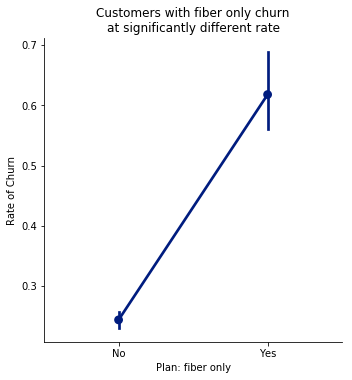

Plan: fiber only
chi2:  150.20775026916175 ; p-value:  1.5615312148875379e-34
observed:
 fiber only     0    1
churn                
False       2811   86
True         907  139
expected:
 [[2731.68805478  165.31194522]
 [ 986.31194522   59.68805478]]
_______________________________________________________________


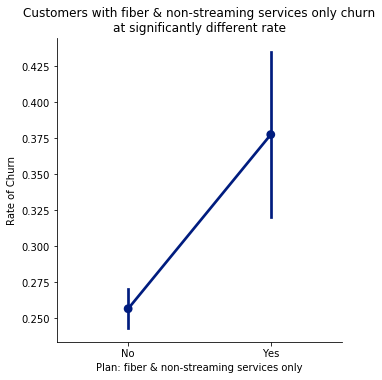

Plan: fiber & non-streaming services only
chi2:  18.77719498237078 ; p-value:  1.4691336451515901e-05
observed:
 fiber & non-streaming services only     0    1
churn                                         
False                                2724  173
True                                  941  105
expected:
 [[2692.74790768  204.25209232]
 [ 972.25209232   73.74790768]]
_______________________________________________________________


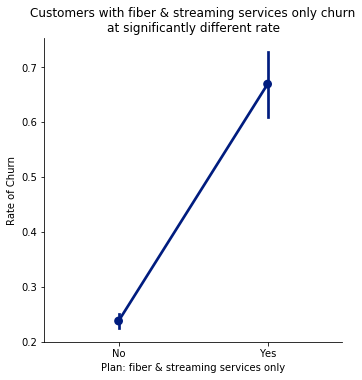

Plan: fiber & streaming services only
chi2:  225.14864603339353 ; p-value:  6.813811917853028e-51
observed:
 fiber & streaming services only     0    1
churn                                     
False                            2813   84
True                              876  170
expected:
 [[2710.38118184  186.61881816]
 [ 978.61881816   67.38118184]]
_______________________________________________________________


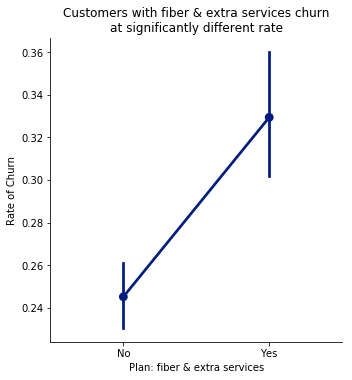

Plan: fiber & extra services
chi2:  25.670662943039154 ; p-value:  4.049363262981584e-07
observed:
 fiber & extra services     0    1
churn                            
False                   2266  631
True                     736  310
expected:
 [[2205.6287091  691.3712909]
 [ 796.3712909  249.6287091]]
_______________________________________________________________


In [97]:
cluster_cols = ['no fiber or extra services', 'non-streaming services only', 
                'streaming services only', 'extra services only',
                'fiber only', 'fiber & non-streaming services only', 
                'fiber & streaming services only', 'fiber & extra services'
               ]

alpha = .05

for column in cluster_cols:
    observed = pd.crosstab(train["churn"], train[column])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        sns.catplot(x=column, y='churn', kind="point", data=train)
        plt.title(f'Customers with {column} churn\nat significantly different rate')
        plt.xlabel(f'Plan: {column}')
        plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
        plt.ylabel('Rate of Churn')
        plt.show()
        print(f'Plan: {column}')
        print("chi2: ", chi2, "; p-value: ", p)
        print("observed:\n", observed)
        print("expected:\n", expected)

        print('_______________________________________________________________')
    else:
        print(column, " Not Significant\n")

##### Does the relationship of fiber to churn still exist when controlling for the type of contract? 

After discovering that customers on a month-to-month plan are more likely to churn than those with a one- or two-year contract, and that customers with fiber are more likely to be on a month-to-month plan, I explored the effect of fiber on churn, independent of being on a month-to-month plan. In doing so, I found that fiber is a driver of churn, independent of being on a month-to-month plan. 

In [98]:
m2m_fiber = pd.crosstab(train[train.m2m_contract==1]['churn'], 
                        train[train.m2m_contract==1]['fiber'])
chi2, p, degf, expected = stats.chi2_contingency(m2m_fiber)
print("Relationship of Fiber to Churn on Month-to-Month Plan")
print("chi-square: ", chi2, "; p-value: ", p)
m2m_fiber.columns = ['no_fiber', 'with_fiber']
m2m_fiber

Relationship of Fiber to Churn on Month-to-Month Plan
chi-square:  179.49256384356622 ; p-value:  6.254823539473123e-41


,no_fiber,with_fiber
churn,,
False,740,522
True,279,659


In [99]:
contract_fiber = pd.crosstab(train[train.m2m_contract==0]['churn'], 
                             train[train.m2m_contract==0]['fiber'])
chi2, p, degf, expected = stats.chi2_contingency(contract_fiber)
print("Relationship of Fiber to Churn on Annual Contract")
print("chi-square: ", chi2, "; p-value: ", p)
contract_fiber.columns = ['no_fiber', 'with_fiber']
contract_fiber

Relationship of Fiber to Churn on Annual Contract
chi-square:  49.86730250443132 ; p-value:  1.645033089897459e-12


,no_fiber,with_fiber
churn,,
False,1183,452
True,43,65


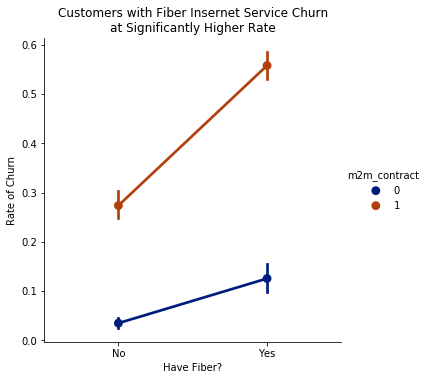

In [100]:
sns.catplot(x='fiber', y='churn', kind="point", hue='m2m_contract', data=train)
plt.title('Customers with Fiber Insernet Service Churn\nat Significantly Higher Rate')
plt.xlabel('Have Fiber?')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Rate of Churn')
plt.show()

#### Modeling

In [101]:
# train['new_customer'] = train['tenure_bin'] <= 1
# validate['new_customer'] = validate['tenure_bin'] <= 1
# test['new_customer'] = test['tenure_bin'] <= 1

mycols = ['m2m_contract', 'fiber', 'paperless_bill', 'mailed_check', 'online_backup', 
          'has_streaming', 'has_nonstreaming_services', 'senior', 'new_customer', 
          'has_multiple_lines', 'has_partner_dependents', 'online_security', 'tech_support',
          'autopayment', 'churn'
         ]

train = train[mycols]
validate = validate[mycols]
test = test[mycols]

In [102]:
# encode target var

# train['churn'] = train[['churn']].astype('int')
# validate['churn'] = validate[['churn']].astype('int')
# test['churn'] = test[['churn']].astype('int')



In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn import metrics

In [104]:
X_train = train.drop(columns=['churn'])
y_train = train[['churn']]

X_validate = validate.drop(columns=['churn'])
y_validate = validate[['churn']]

X_test = test.drop(columns=['churn'])
y_test = test[['churn']]

##### Baseline Predictions

If we predict the most common class, how will our model perform? 
Because 73% of all customers have not churned, if we predict all customers to not churn, we will achieve roughly 73% accuracy. 

In [105]:
# rate of churn on our training dataset :
y_train.value_counts() / len(y_train)

churn
0        0.73472
1        0.26528
dtype: float64

In [106]:
y_validate['baseline_pred']=0
y_validate['baseline_prob']=(1-y_train.mean()).round(2)[0]

##### Logistic Regression

In [107]:
logr = LogisticRegression()
logr.fit(X_train, y_train.churn)
y_validate['logr_pred'] = logr.predict(X_validate)
y_pred_proba = logr.predict_proba(X_validate)
y_validate['logr_prob'] = [y_pred_proba[i][1] 
                           for i in range(len(y_validate.churn))]

importance = logr.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 
                                      'logr': abs(importance)})

##### AdaBoost

In [108]:
ada = AdaBoostClassifier(random_state=123)
ada.fit(X_train, y_train.churn)
y_validate['ada_pred'] = ada.predict(X_validate)
y_pred_proba = ada.predict_proba(X_validate)
y_validate['ada_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.churn))]

importance = pd.DataFrame({'ada': ada.feature_importances_})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

##### Complement Naive Bayes



In [ ]:
cnb = ComplementNB()
cnb.fit(X_train, y_train.churn)
y_validate['cnb_pred'] = cnb.predict(X_validate)
y_pred_proba = cnb.predict_proba(X_validate)
y_validate['cnb_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.churn))]

importances = permutation_importance(cnb, X_validate, y_validate.churn, random_state=123)
importance = pd.DataFrame({'cnb': abs(importances.importances_mean)})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

##### Bernoulli Naive Bayes

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.churn)
y_validate['bnb_pred'] = bnb.predict(X_validate)
y_pred_proba = bnb.predict_proba(X_validate)
y_validate['bnb_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.churn))]

importances = permutation_importance(bnb, X_validate, y_validate.churn, random_state=123)
importance = pd.DataFrame({'bnb': abs(importances.importances_mean)})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

##### Multinomial Naive Bayes

In [110]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train.churn)
y_validate['mnb_pred'] = mnb.predict(X_validate)
y_pred_proba = mnb.predict_proba(X_validate)
y_validate['mnb_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.churn))]

importances = permutation_importance(mnb, X_validate, y_validate.churn, random_state=123)
importance = pd.DataFrame({'mnb': abs(importances.importances_mean)})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

##### KNN

In [112]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train.churn)
y_validate['knn_pred'] = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
y_validate['knn_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.churn))]

importances = permutation_importance(knn, X_validate, y_validate.churn, random_state=123)
importance = pd.DataFrame({'knn': importances.importances_mean})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

##### Support Vector Classifier

In [113]:
svc = SVC(kernel="linear", C=0.025, probability=True, random_state=123)
svc.fit(X_train, y_train.churn)
y_validate['svc_pred'] = svc.predict(X_validate)
y_pred_proba = svc.predict_proba(X_validate)
y_validate['svc_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.churn))]

importances = permutation_importance(svc, X_validate, y_validate.churn, random_state=123)
importance = pd.DataFrame({'svc': importances.importances_mean})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

##### Decision Tree

In [114]:
dt = DecisionTreeClassifier(max_depth=4, random_state=123)
dt.fit(X_train, y_train.churn)
y_validate['dt_pred'] = dt.predict(X_validate)
y_pred_proba = dt.predict_proba(X_validate)
y_validate['dt_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.churn))]

importance = pd.DataFrame({'dt': dt.feature_importances_})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

##### Random Forest

In [115]:
rf = RandomForestClassifier(max_depth=4, n_estimators=100, max_features=1, random_state=123)
rf.fit(X_train, y_train.churn)
y_validate['rf_pred'] = rf.predict(X_validate)
y_pred_proba = rf.predict_proba(X_validate)
y_validate['rf_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.churn))]

importance = pd.DataFrame({'rf': rf.feature_importances_})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

##### Confusion Matrix

Baseline-Predict Most Frequent
        No Churn (0)  Churn (1)
pred 0          1242        449
pred 1             0          0
accuracy: 73.45%
misclassification: 26.55%
recall: 0.00%
specificity: 100.00%
type I error rate: 0.00%
type II error rate: 100.00%
precision: 0.00%
f1 score: 0.00%
AUC score: 0.5




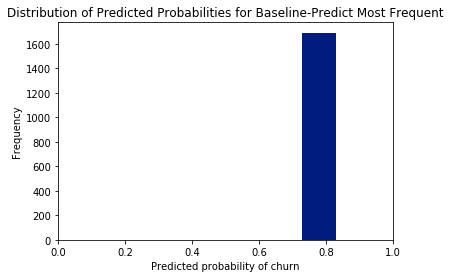

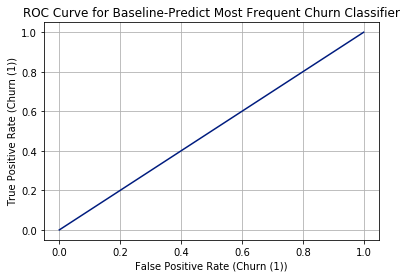

Logistic Regression
        No Churn (0)  Churn (1)
pred 0          1114        227
pred 1           128        222
accuracy: 79.01%
misclassification: 20.99%
recall: 49.44%
specificity: 89.69%
type I error rate: 10.31%
type II error rate: 50.56%
precision: 63.43%
f1 score: 55.57%
AUC score: 0.84




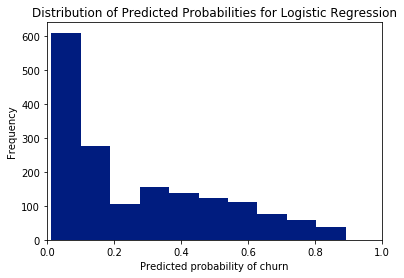

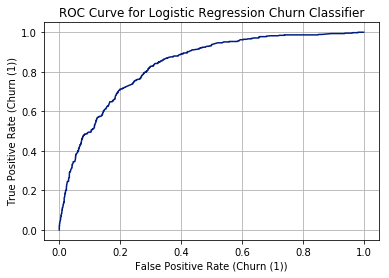

K-Nearest Neighbors
        No Churn (0)  Churn (1)
pred 0          1079        237
pred 1           163        212
accuracy: 76.35%
misclassification: 23.65%
recall: 47.22%
specificity: 86.88%
type I error rate: 13.12%
type II error rate: 52.78%
precision: 56.53%
f1 score: 51.46%
AUC score: 0.77




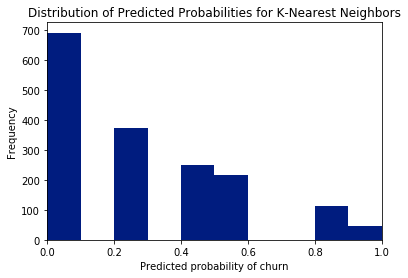

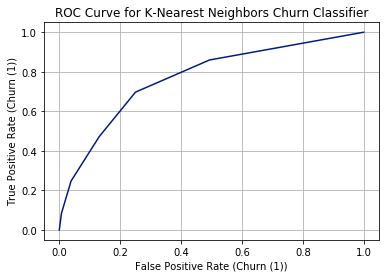

Support Vector Classifier
        No Churn (0)  Churn (1)
pred 0          1159        269
pred 1            83        180
accuracy: 79.18%
misclassification: 20.82%
recall: 40.09%
specificity: 93.32%
type I error rate: 6.68%
type II error rate: 59.91%
precision: 68.44%
f1 score: 50.56%
AUC score: 0.83




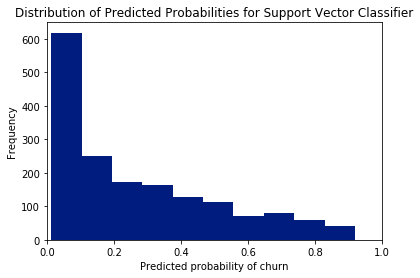

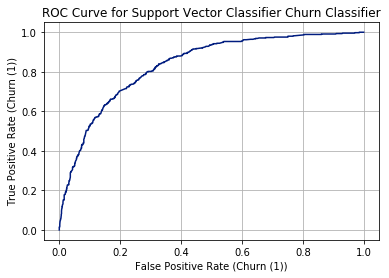

Decision Tree
        No Churn (0)  Churn (1)
pred 0          1081        218
pred 1           161        231
accuracy: 77.59%
misclassification: 22.41%
recall: 51.45%
specificity: 87.04%
type I error rate: 12.96%
type II error rate: 48.55%
precision: 58.93%
f1 score: 54.93%
AUC score: 0.81




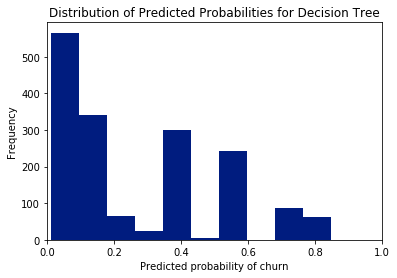

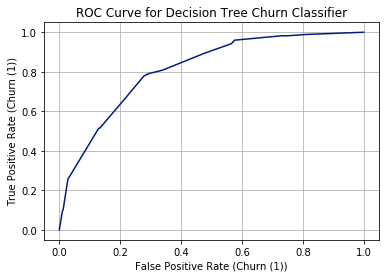

Random Forest
        No Churn (0)  Churn (1)
pred 0          1227        392
pred 1            15         57
accuracy: 75.93%
misclassification: 24.07%
recall: 12.69%
specificity: 98.79%
type I error rate: 1.21%
type II error rate: 87.31%
precision: 79.17%
f1 score: 21.88%
AUC score: 0.84




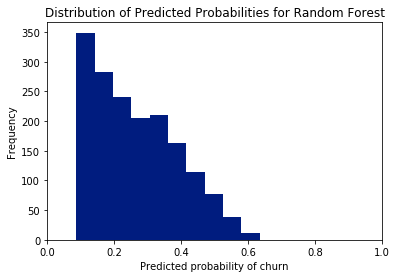

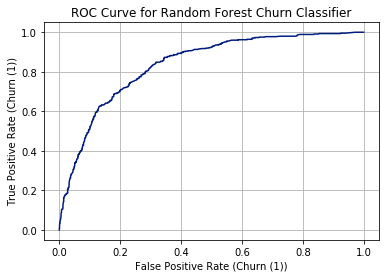

AdaBoost
        No Churn (0)  Churn (1)
pred 0          1113        227
pred 1           129        222
accuracy: 78.95%
misclassification: 21.05%
recall: 49.44%
specificity: 89.61%
type I error rate: 10.39%
type II error rate: 50.56%
precision: 63.25%
f1 score: 55.50%
AUC score: 0.83




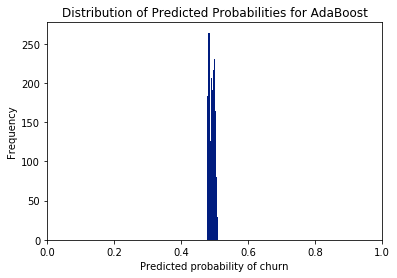

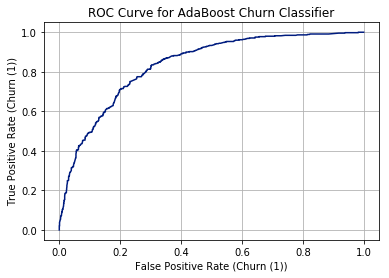

Complement Naive Bayes
        No Churn (0)  Churn (1)
pred 0           891        103
pred 1           351        346
accuracy: 73.15%
misclassification: 26.85%
recall: 77.06%
specificity: 71.74%
type I error rate: 28.26%
type II error rate: 22.94%
precision: 49.64%
f1 score: 60.38%
AUC score: 0.81




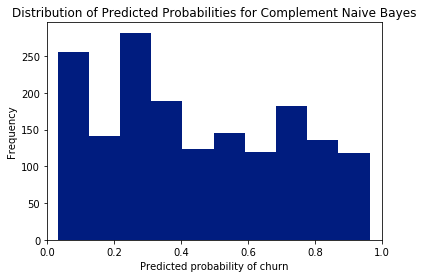

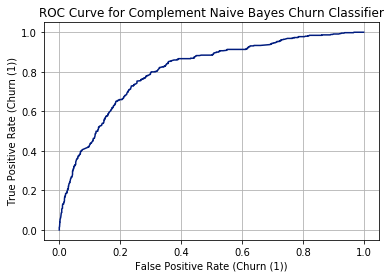

Multinomial Naive Bayes
        No Churn (0)  Churn (1)
pred 0          1102        241
pred 1           140        208
accuracy: 77.47%
misclassification: 22.53%
recall: 46.33%
specificity: 88.73%
type I error rate: 11.27%
type II error rate: 53.67%
precision: 59.77%
f1 score: 52.20%
AUC score: 0.81




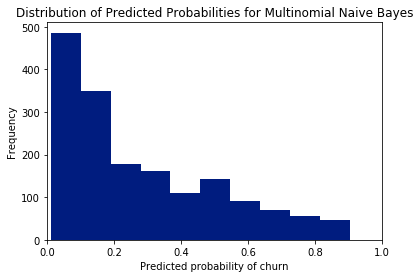

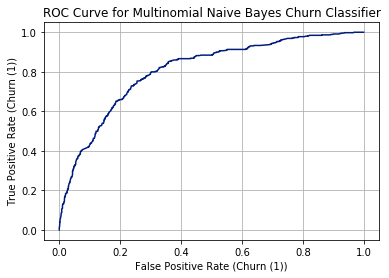

Bernoulli Naive Bayes
        No Churn (0)  Churn (1)
pred 0          1016        157
pred 1           226        292
accuracy: 77.35%
misclassification: 22.65%
recall: 65.03%
specificity: 81.80%
type I error rate: 18.20%
type II error rate: 34.97%
precision: 56.37%
f1 score: 60.39%
AUC score: 0.83




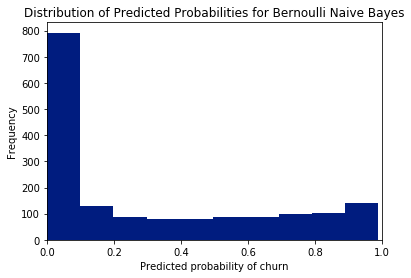

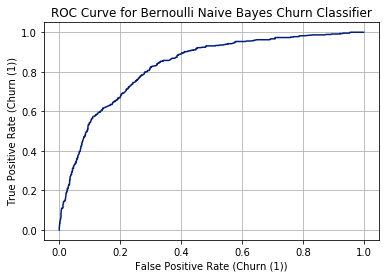

In [116]:
classifiers = ['baseline', 'logr', 'knn', 'svc', 'dt', 'rf', 'ada', 'cnb', 'mnb', 'bnb']
clf_names = ['Baseline-Predict Most Frequent', 'Logistic Regression', 'K-Nearest Neighbors', 
             'Support Vector Classifier', 'Decision Tree', 'Random Forest', 'AdaBoost', 
             'Complement Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes']

for i in range(len(classifiers)):
    clf = classifiers[i]
    col = clf+'_pred'
    col_prob = clf+'_prob'
    name = clf_names[i]
    cm = metrics.confusion_matrix(y_validate.churn, y_validate[col])
    cm = pd.DataFrame({'No Churn (0)': cm[0], 'Churn (1)': cm[1]}, 
                      index=['pred 0', 'pred 1'])
    accuracy = metrics.accuracy_score(y_validate.churn, y_validate[col])
    misclassification = 1-accuracy
    recall = metrics.recall_score(y_validate.churn, y_validate[col])
    specificity = cm['No Churn (0)'][0]/(cm['No Churn (0)'].sum())
    fpr = 1 - specificity
    fnr = cm['Churn (1)'][0]/(cm['Churn (1)'].sum())
    precision = metrics.precision_score(y_validate.churn, y_validate[col])
    f1 = metrics.f1_score(y_validate.churn, y_validate[col])
    auc = metrics.roc_auc_score(y_validate.churn, y_validate[col_prob])
    
    print(name)
    print(cm)
    print(f'accuracy: {accuracy:.2%}')
    print(f'misclassification: {misclassification:.2%}')
    print(f'recall: {recall:.2%}')
    print(f'specificity: {specificity:.2%}')
    print(f'type I error rate: {fpr:.2%}')
    print(f'type II error rate: {fnr:.2%}')
    print(f'precision: {precision:.2%}')
    print(f'f1 score: {f1:.2%}')
    print(f'AUC score: {auc:.2}')
    print("\n")
    
    plt.hist(y_validate[col_prob])
    plt.xlim(0,1)
    plt.title(f'Distribution of Predicted Probabilities for {name}')
    plt.xlabel('Predicted probability of churn')
    plt.ylabel('Frequency')
    plt.show()
    
    fpr, tpr, thresholds = metrics.roc_curve(y_validate.churn, y_validate[col_prob])
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate (Churn (1))")
    plt.ylabel("True Positive Rate (Churn (1))")
    plt.title(f'ROC Curve for {name} Churn Classifier')
    plt.grid(True)
    plt.show()

    

##### Feature Importances

In [117]:
classifiers = ['cnb', 'bnb']
for clf in classifiers:
    ranked_col = clf+'_rank'
    feature_importance_df[ranked_col] = feature_importance_df[clf].rank(ascending=True)

rank_mean = pd.DataFrame({'rank_mean': feature_importance_df.filter(regex='\_rank').mean(axis=1)})
feature_importance_df = pd.concat([feature_importance_df, rank_mean], 
                                  axis=1).sort_values(['rank_mean'], 
                                                      ascending=False).reset_index(drop=True)

In [119]:
feature_importance_df = feature_importance_df.reset_index(drop=True).drop(columns=['logr', 
                                                                                   'ada', 
                                                                                   'dt',
                                                                                   'mnb', 
                                                                                   'knn', 
                                                                                   'svc', 
                                                                                   'rf'])
feature_importance_df

,Feature,cnb,bnb,cnb_rank,bnb_rank,rank_mean
0,fiber,0.021881,0.017504,13.0,14.0,13.50
1,m2m_contract,0.014075,0.015376,12.0,13.0,12.50
2,new_customer,0.031815,0.005559,14.0,9.0,11.50
3,has_partner_dependents,0.003430,0.007924,7.0,11.0,9.00
4,autopayment,0.003075,0.008279,6.0,12.0,9.00
5,paperless_bill,0.004258,0.003785,10.0,6.0,8.00
6,mailed_check,0.009107,0.002720,11.0,5.0,8.00
7,online_security,0.003666,0.003903,8.0,7.0,7.50
8,has_nonstreaming_services,0.002720,0.007096,4.5,10.0,7.25
9,tech_support,0.002720,0.004731,4.5,8.0,6.25


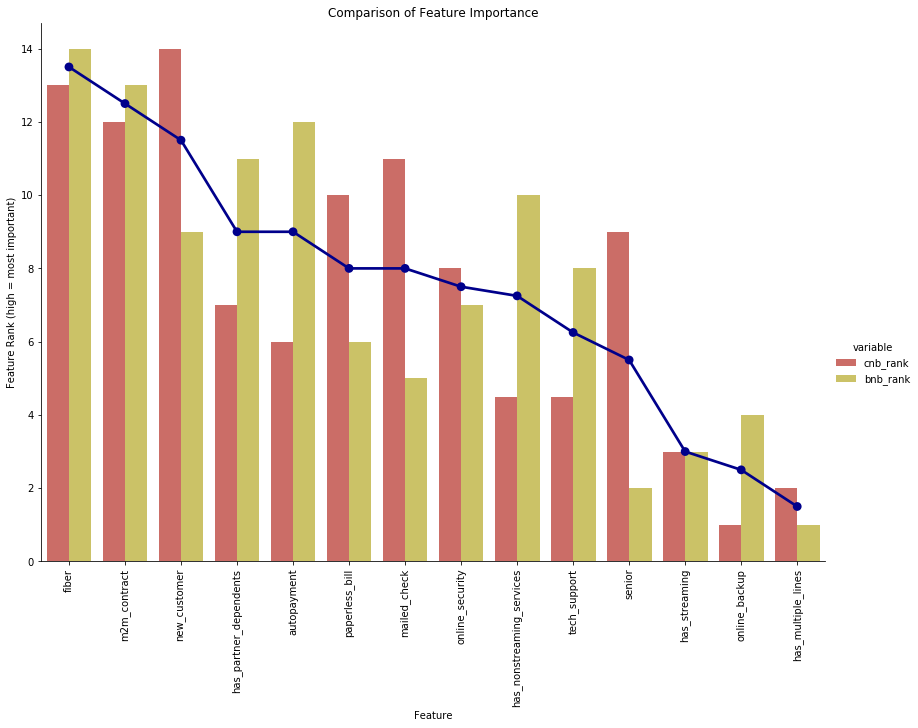

In [120]:
feature_importance_ranks = feature_importance_df.drop(columns=['cnb', 'bnb', 'rank_mean'])
feature_importance_ranks = pd.melt(feature_importance_ranks, id_vars = 'Feature')

sns.set_palette("hls", 7)

sns.catplot(x = 'Feature', y='value', hue='variable', data=feature_importance_ranks, kind='bar', 
           height=8.27, aspect=11.7/8.27)

sns.set_palette('dark')
ax = sns.pointplot(x='Feature', y='rank_mean', data=feature_importance_df, color='darkblue', 
                   size=3)
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100, label="")
plt.ylabel('Feature Rank (high = most important)')
plt.title('Comparison of Feature Importance')
plt.xticks(rotation=90)
plt.show()

#### Justification of Methods of Analysis

Justify the methods you have chosen to analyze your data. Be sure to include details about how the methods you have chosen better represents your findings than other methods.

#### Justification of Visual Representation

Justify the methods you have chosen to visually present your data. Be sure to include details about how the presentation methods you chose better represents your findings than other presentation methods.


### Data Summary

#### Phenomenon
#### Detection